Author : Nithin Sai Jalukuru <br>
Date : 09/30/2022 <br>
SDM-1

https://github.com/jns1406/R-Practice-1

In [1]:
rm(list = ls())

In [2]:
options(warn=0)

# Question 1
1) In this exercise, we will predict the number of applications received using the
other variables in the College data set in the ISLR2 package.
** be sure to look closely at this data, you may want to consider the multi-scale
nature of the problem, and perhaps use a transformation on some of the
variables.**
(a) Split the data set into a training set and a test set. Fit a linear model using least
squares on the training set, and report the test error obtained.
(b) Fit a ridge regression model on the training set, with λ chosen by crossvalidation.
Report the test error obtained.
(d) Fit a lasso model on the training set, with λ chosen by cross-validation.
Report the test error obtained, along with the number of non-zero coefficient
estimates.
(g) Comment more generally on the results obtained. How accurately can we
predict the number of college applications received? Is there much difference
among the test errors resulting from these five approaches?

In [3]:
library("ISLR2")
college_data = College
head(college_data)


Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

In [4]:
dim(college_data)

[1] 777  18

In [5]:
colSums(is.na(college_data))

Private        Apps      Accept      Enroll   Top10perc   Top25perc 
          0           0           0           0           0           0 
F.Undergrad P.Undergrad    Outstate  Room.Board       Books    Personal 
          0           0           0           0           0           0 
        PhD    Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
          0           0           0           0           0           0

>**No NA's in the given dataset**

In [6]:
sapply(college_data, class) # checking what type of each column is

Private        Apps      Accept      Enroll   Top10perc   Top25perc 
   "factor"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
F.Undergrad P.Undergrad    Outstate  Room.Board       Books    Personal 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
        PhD    Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

> **All are numeric type except Private feature**

In [7]:
summary(college_data)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [8]:

library("ggplot2")


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:

library("egg")

Loading required package: gridExtra


> **Below are Histogram and box plot of each feature on same axis, in this way its very easy to identify which outliers are to be removed and provides more information of the feature**

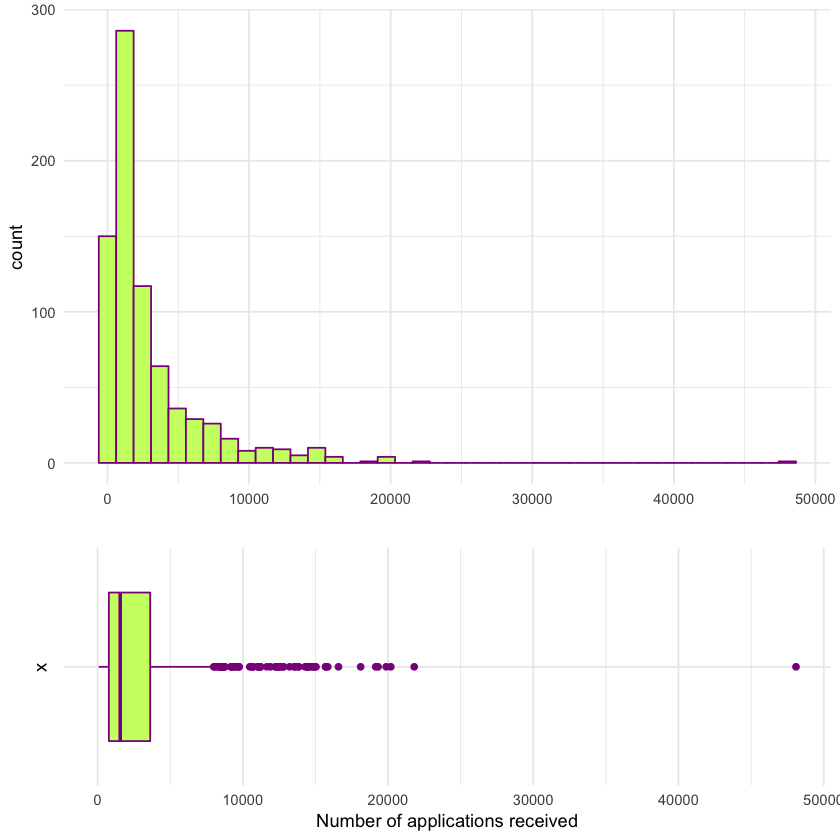

In [10]:
plot1 = ggplot(college_data, aes(x=Apps))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Apps)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Number of applications received")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

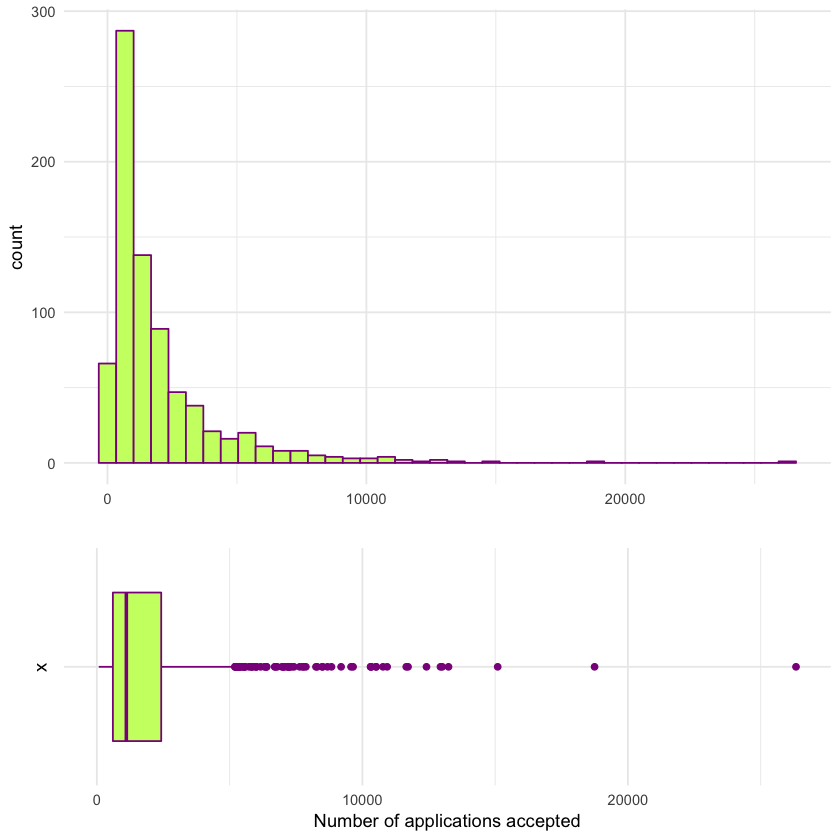

In [11]:
plot1 = ggplot(college_data, aes(x=Accept))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Accept)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Number of applications accepted")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

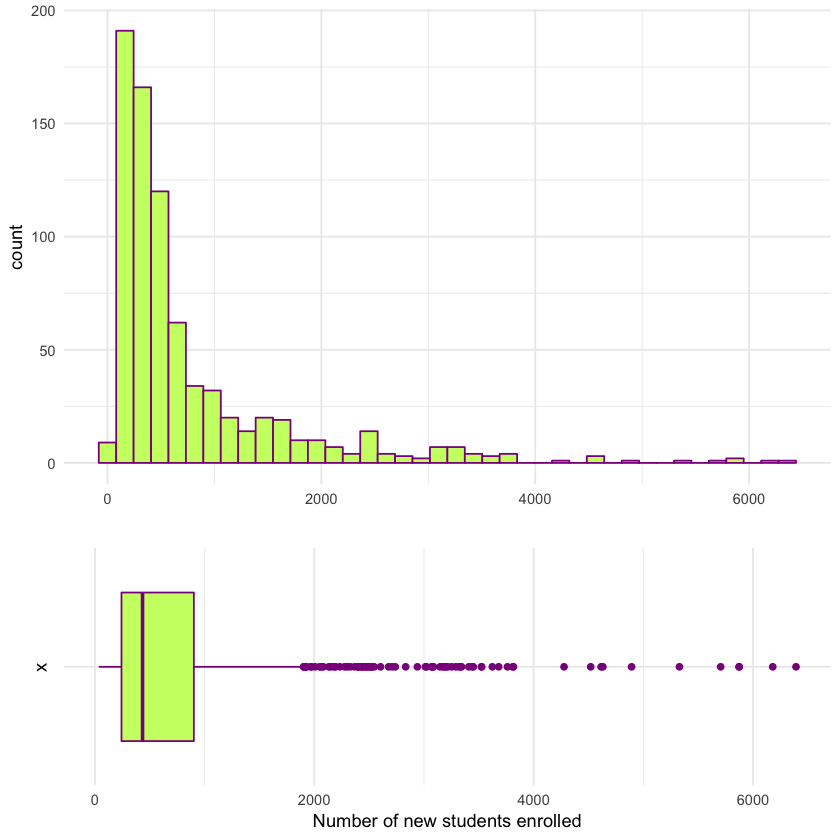

In [12]:
plot1 = ggplot(college_data, aes(x=Enroll))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Enroll)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Number of new students enrolled")+coord_flip()
egg::ggarrange(plot1, plot2, heights = 2:1)

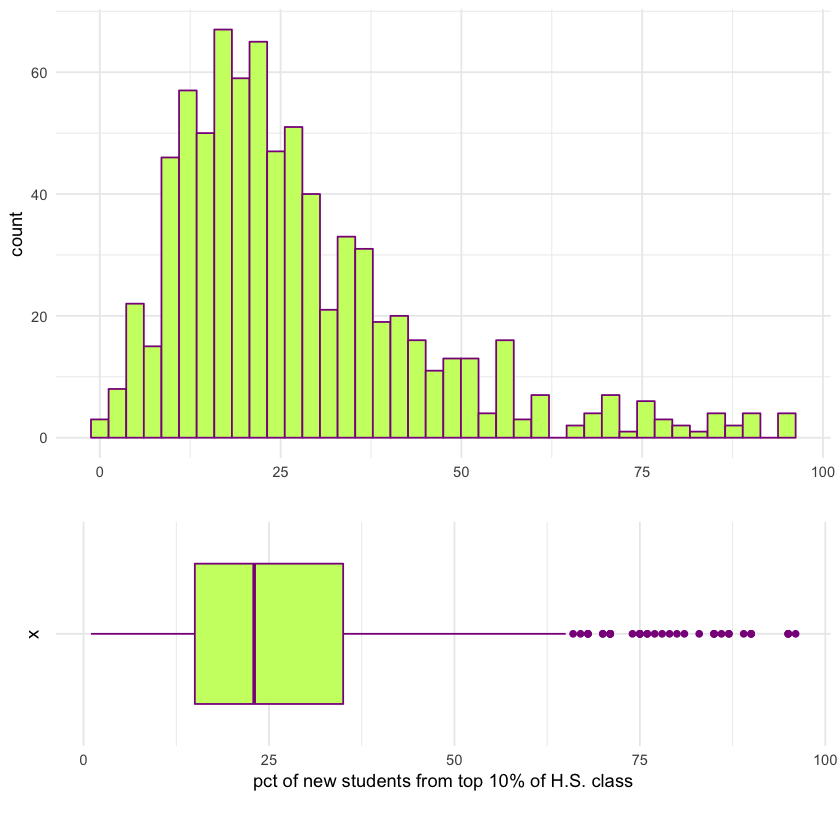

In [13]:
plot1 = ggplot(college_data, aes(x=Top10perc))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Top10perc)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("pct of new students from top 10% of H.S. class

")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

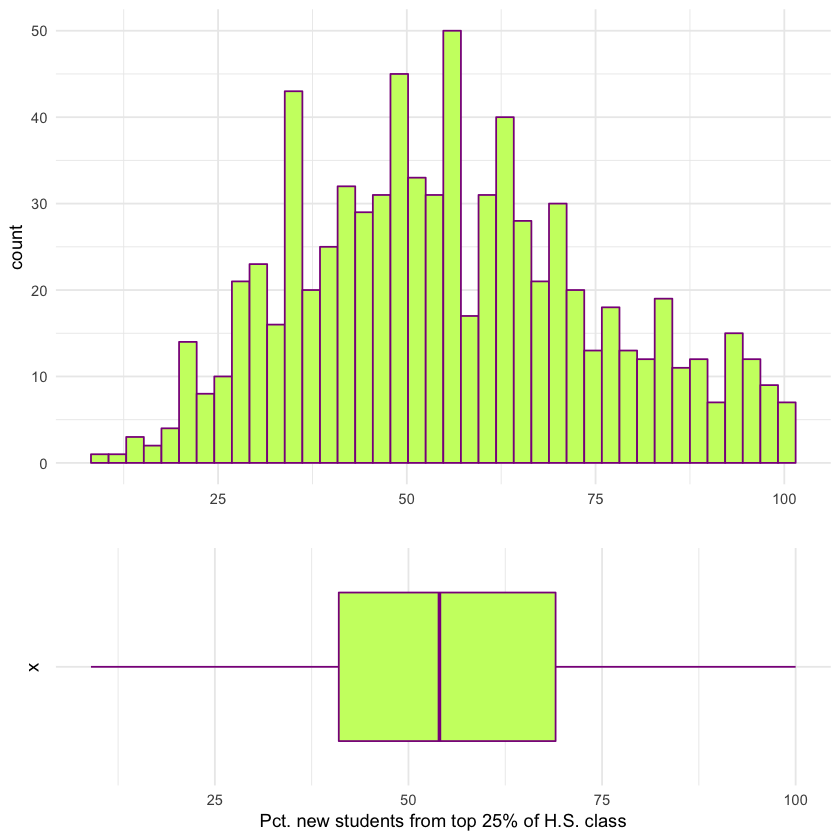

In [14]:
plot1 = ggplot(college_data, aes(x=Top25perc))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Top25perc)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Pct. new students from top 25% of H.S. class")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

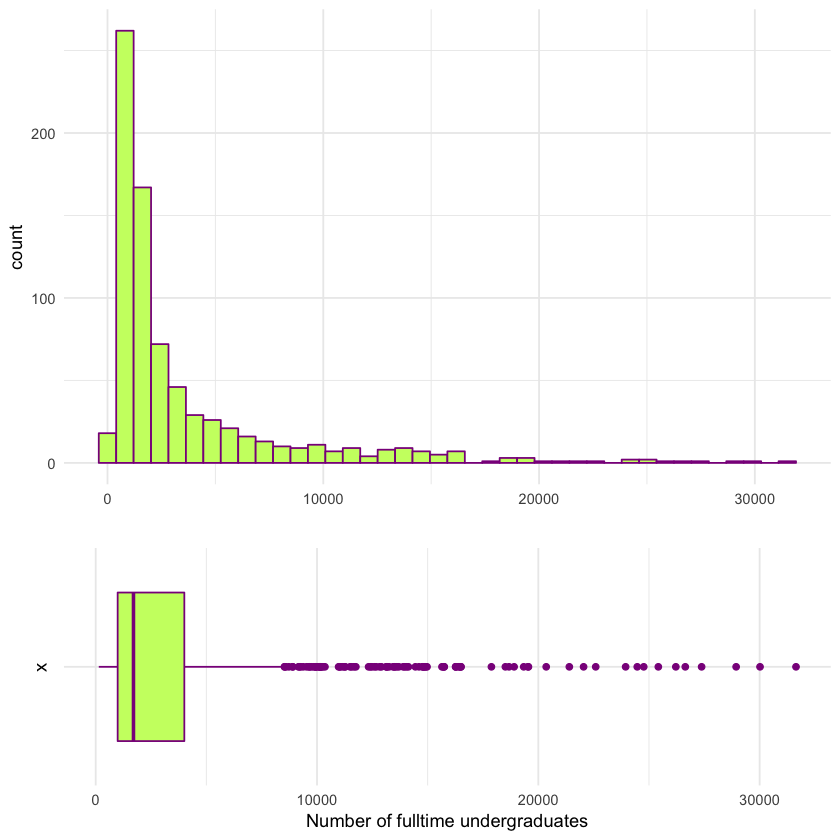

In [15]:
plot1 = ggplot(college_data, aes(x=F.Undergrad))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = F.Undergrad)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Number of fulltime undergraduates")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

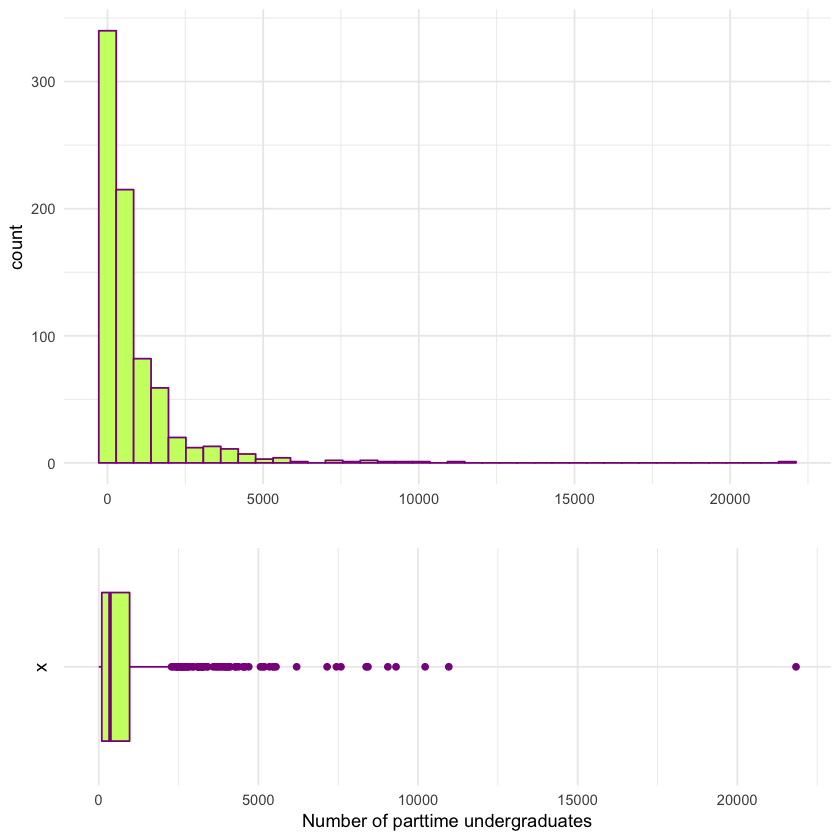

In [16]:
plot1 = ggplot(college_data, aes(x=P.Undergrad))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = P.Undergrad)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Number of parttime undergraduates")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

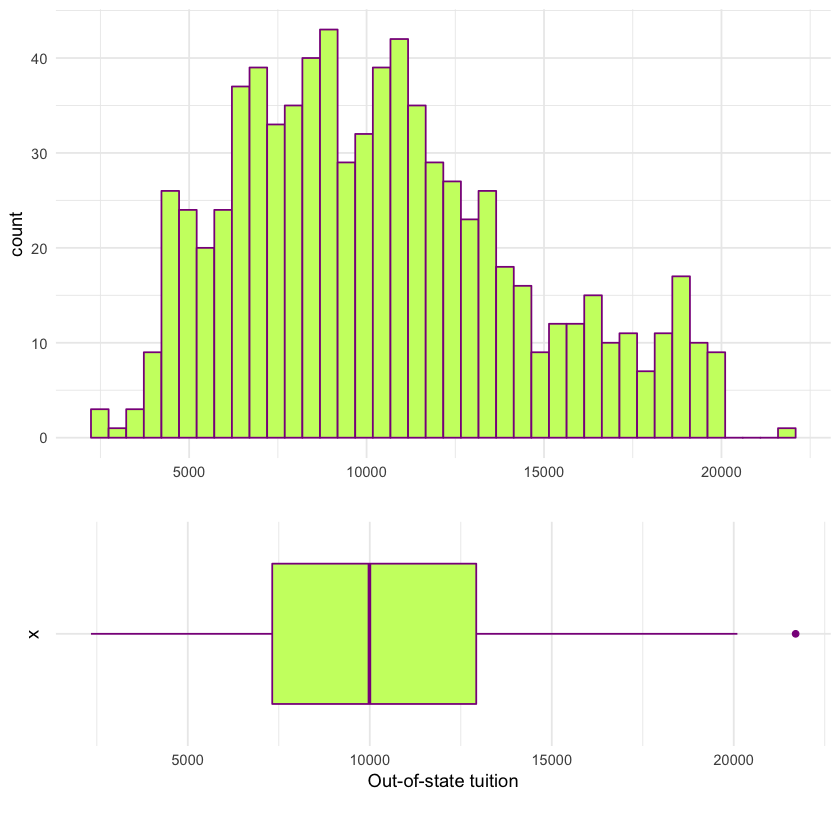

In [17]:
plot1 = ggplot(college_data, aes(x=Outstate))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Outstate)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Out-of-state tuition

")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

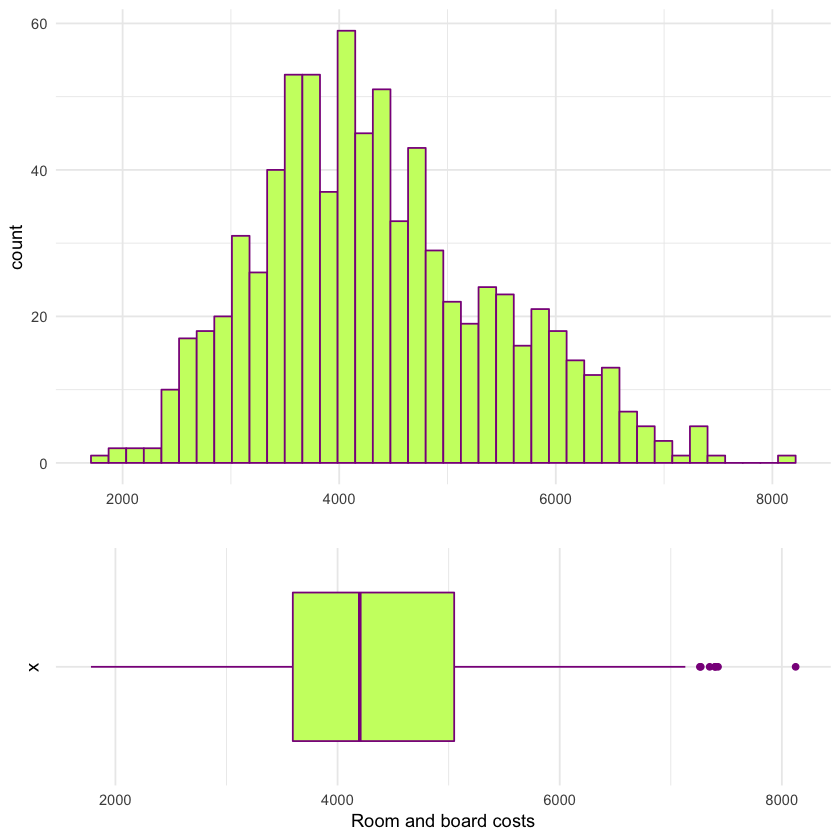

In [18]:
plot1 = ggplot(college_data, aes(x=Room.Board))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Room.Board)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Room and board costs")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

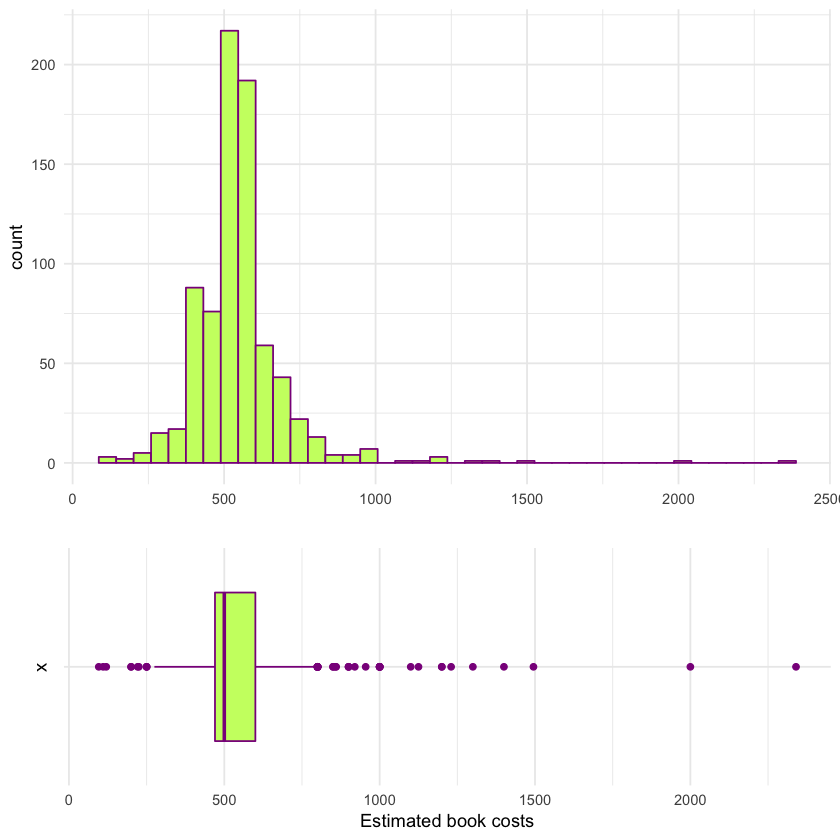

In [19]:
plot1 = ggplot(college_data, aes(x=Books))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Books)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Estimated book costs")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

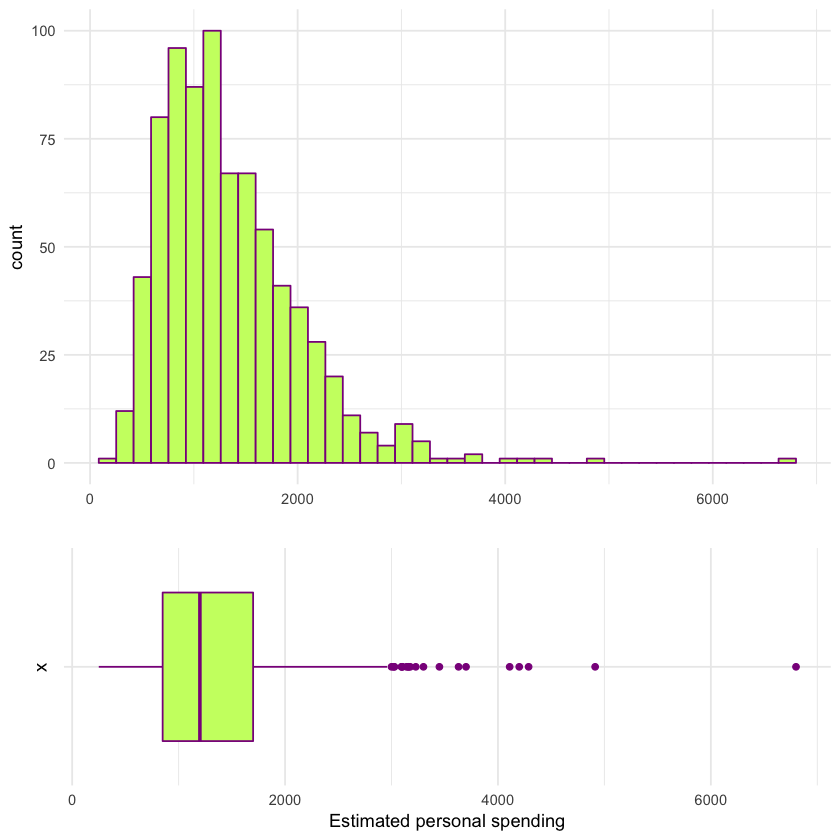

In [20]:
plot1 = ggplot(college_data, aes(x=Personal))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Personal)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Estimated personal spending")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

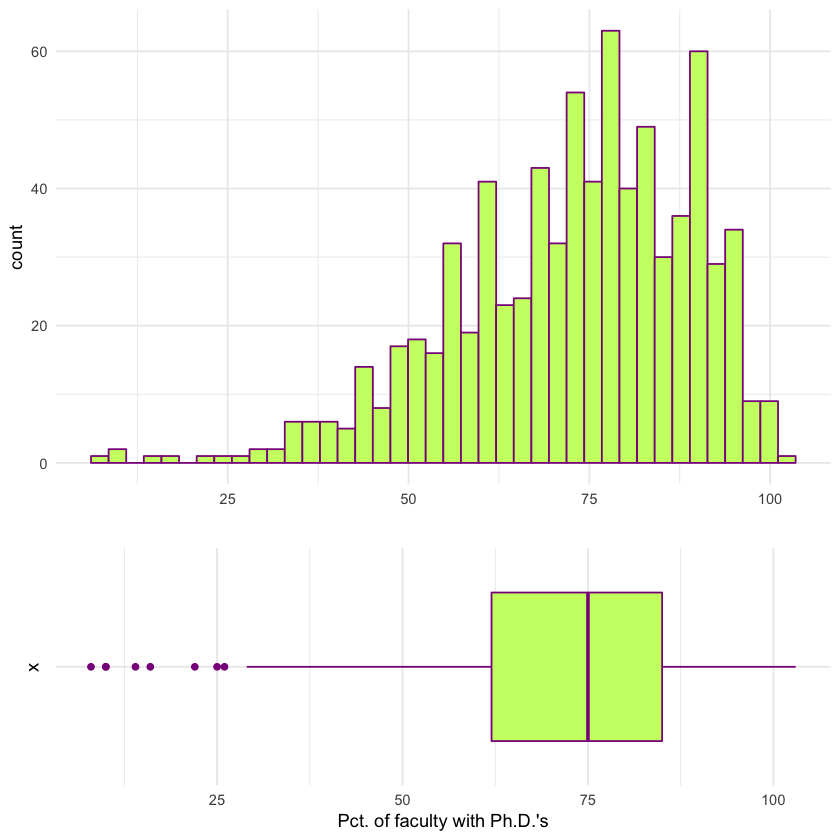

In [21]:
plot1 = ggplot(college_data, aes(x=PhD))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = PhD)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Pct. of faculty with Ph.D.'s")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

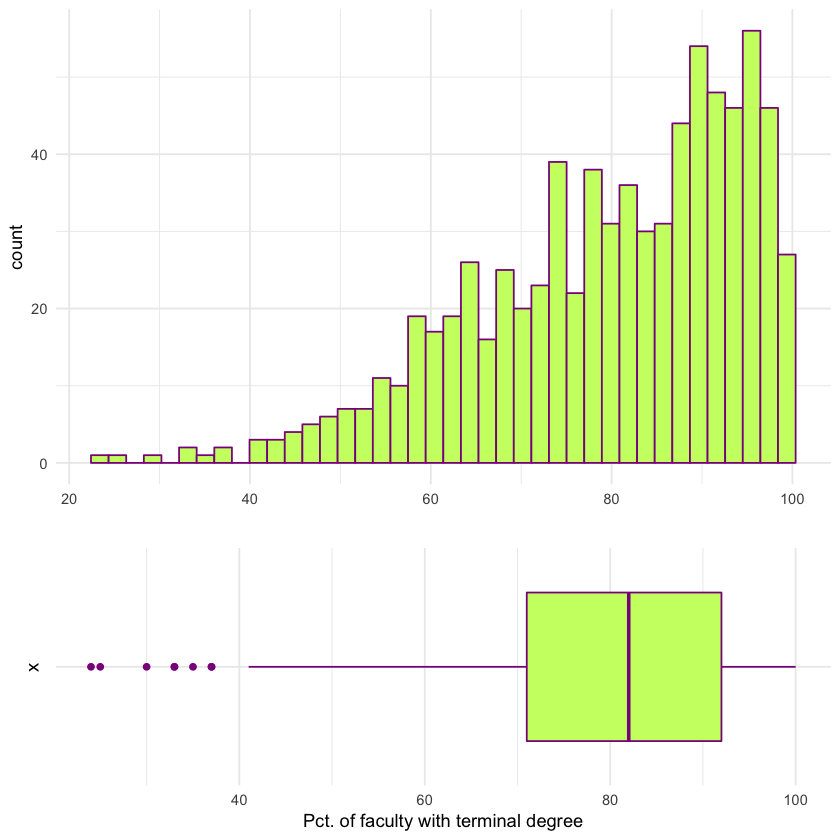

In [22]:
plot1 = ggplot(college_data, aes(x=Terminal))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Terminal)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Pct. of faculty with terminal degree")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

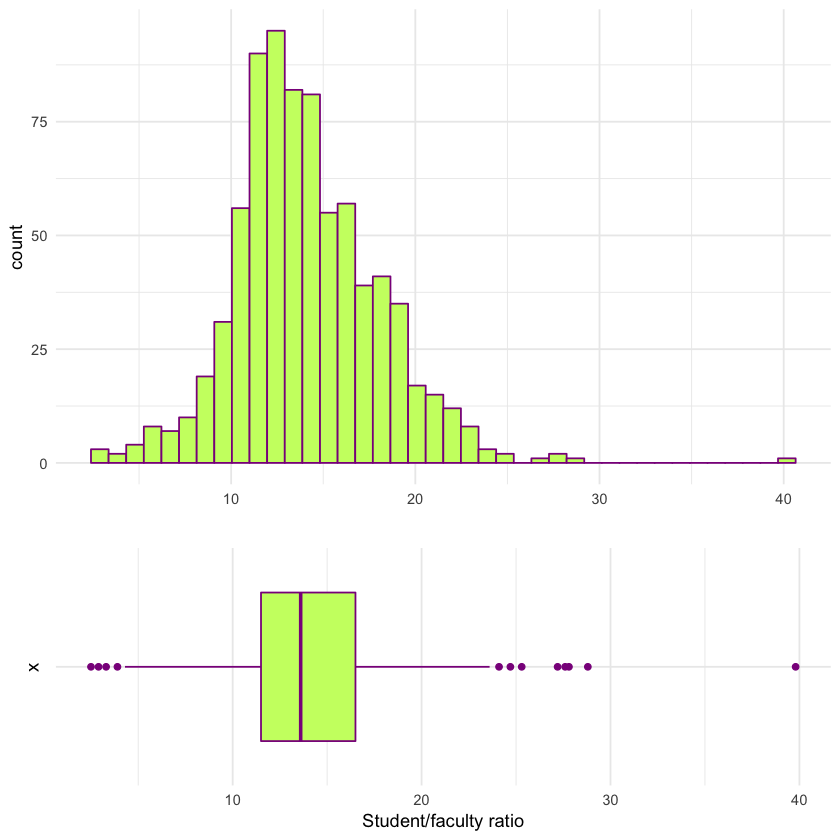

In [23]:
plot1 = ggplot(college_data, aes(x=S.F.Ratio))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = S.F.Ratio)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Student/faculty ratio")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

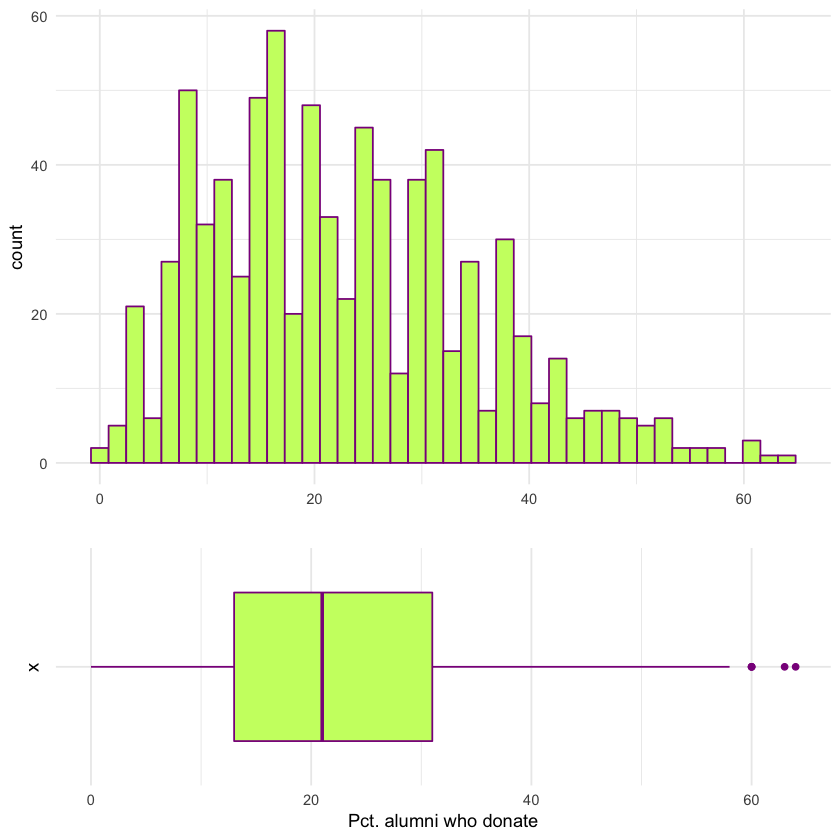

In [24]:
plot1 = ggplot(college_data, aes(x=perc.alumni))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = perc.alumni)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Pct. alumni who donate")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

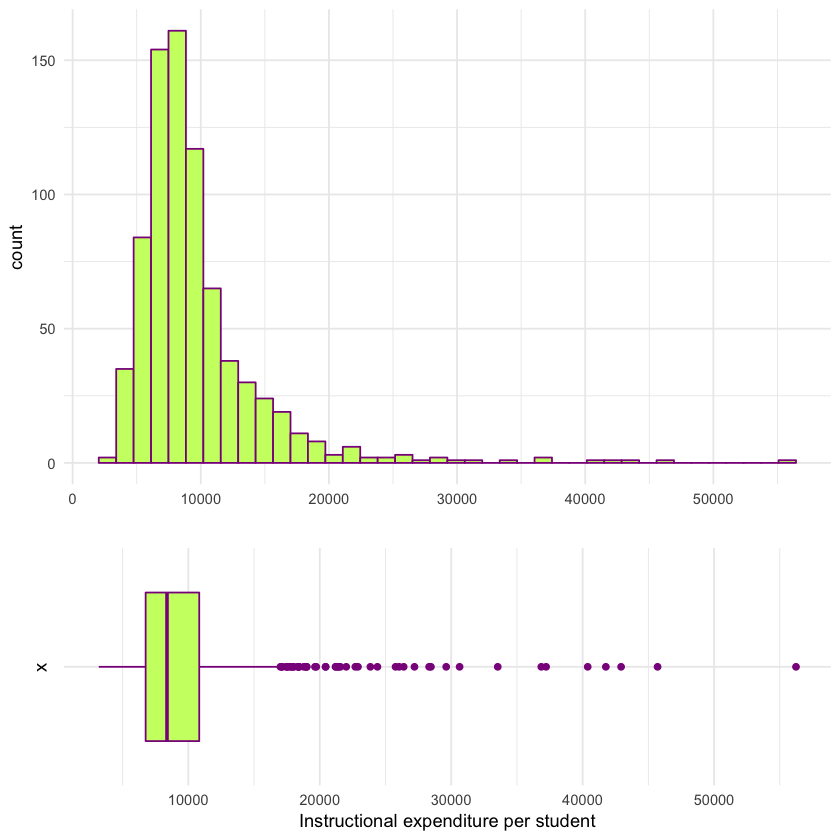

In [25]:
plot1 = ggplot(college_data, aes(x=Expend))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Expend)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Instructional expenditure per student")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

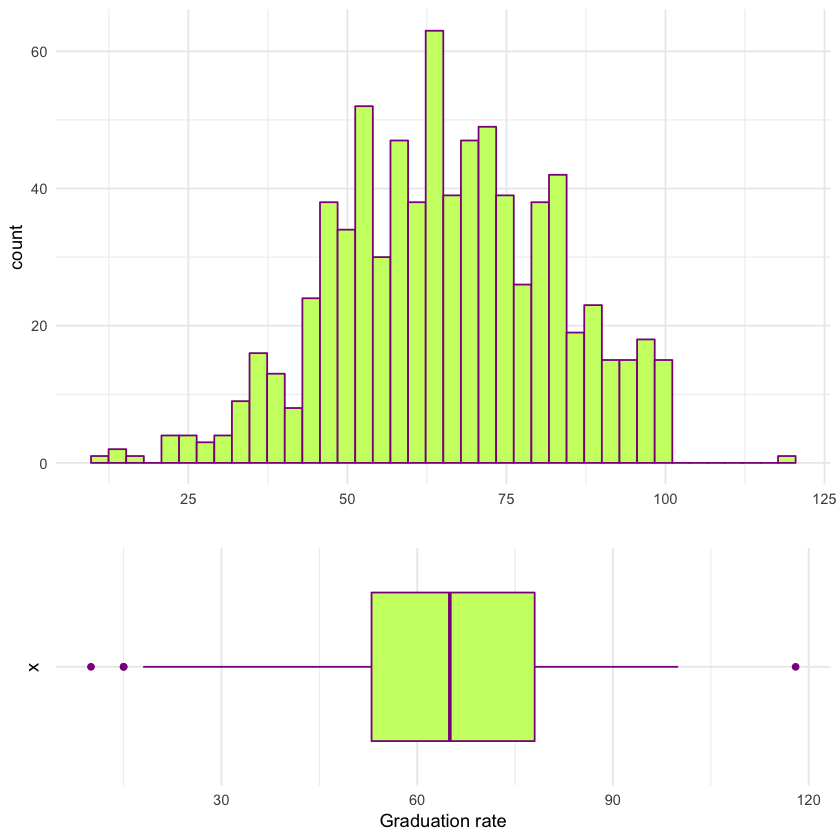

In [26]:
plot1 = ggplot(college_data, aes(x=Grad.Rate))+
  geom_histogram(fill="darkolivegreen1", color="darkmagenta",bins=40)+theme_minimal()+xlab("")

plot2 = ggplot(college_data, aes(x="",y = Grad.Rate)) +
  geom_boxplot(color = "darkmagenta", fill = "darkolivegreen1")+theme_minimal()+ylab("Graduation rate")+coord_flip()

egg::ggarrange(plot1, plot2, heights = 2:1)

> **The following Features have outliers: 1. Apps 2.Accept 3.Enroll 4.Top10perc 5.P.Undergrad 6.Outstate 7.Room.Board 8.Books 9.Expend 10.Grad.rate 11.Personal 12.Phd 13.Terminal 14.S.F.Ratio 15.perc.alumni**


> **I have removed the outliers based on the based visualisations , they were too many outliers in each feature . So, i eliminated extreme outliers based on their frequency**

In [27]:
outlier_apps = which(college_data$Apps > 17000)
college_data = college_data[-outlier_apps,]


outlier_accept = which(college_data$Accept > 10000)
college_data = college_data[-outlier_accept,]

outlier_Enroll = which(college_data$Enroll >4000)
college_data = college_data[-outlier_Enroll,]

outlier_Top10perc = which(college_data$Top10perc >80)
college_data = college_data[-outlier_Top10perc,]

outlier_F.Undergrad = which(college_data$F.Undergrad >15000)
college_data = college_data[-outlier_F.Undergrad,]

outlier_P.Undergrad = which(college_data$P.Undergrad >5000)
college_data = college_data[-outlier_P.Undergrad,]

outlier_Outstate = which(college_data$Outstate >20000)
college_data = college_data[-outlier_Outstate,]

outlier_Room.Board = which(college_data$Room.Board >7500)
college_data = college_data[-outlier_Room.Board,]


outlier_Books = which(college_data$Books >1000)
college_data = college_data[-outlier_Books,]


outlier_Expend = which(college_data$Expend >30000)
college_data = college_data[-outlier_Expend,]

outlier_Grad.Rate = which(college_data$Grad.Rate >100)
college_data = college_data[-outlier_Grad.Rate,]

outlier_Personal = which(college_data$Personal > 4000)
college_data = college_data[-outlier_Personal,]

outlier_PhD = which(college_data$PhD <25)
college_data = college_data[-outlier_PhD,]

outlier_Terminal = which(college_data$Terminal <40)
college_data = college_data[-outlier_Terminal,]

outlier_S.F.Ratio = which(college_data$S.F.Ratio > 25)
college_data = college_data[-outlier_S.F.Ratio,]


outlier_perc.alumni = boxplot(college_data$perc.alumni, plot=FALSE)$out
college_data = college_data[-which(college_data$perc.alumni %in% outlier_perc.alumni),]




In [28]:
dim(college_data)

[1] 676  18

> **The new dimension the dataset after removing the outliers is 676 x 8 from original dataset of 777 x 18 dimension**

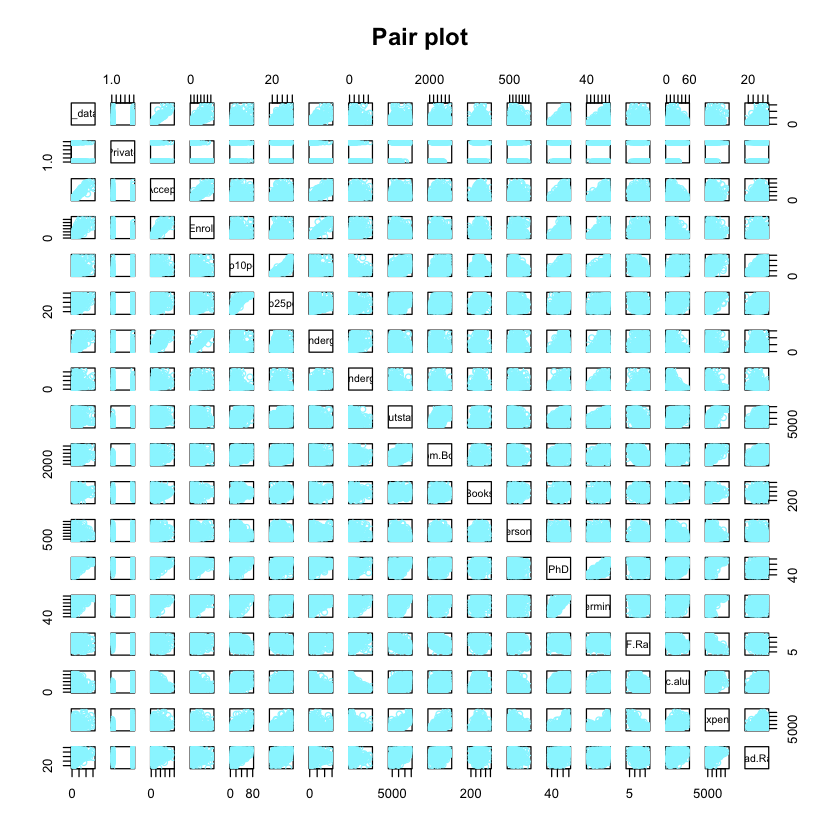

In [29]:
pairs(college_data$Apps ~. , data = college_data, pch=1, col="cadetblue1",main ="Pair plot")

> **It very hard to interpret because of very large numbers in some of the features. so have to apply transformations when necessary**

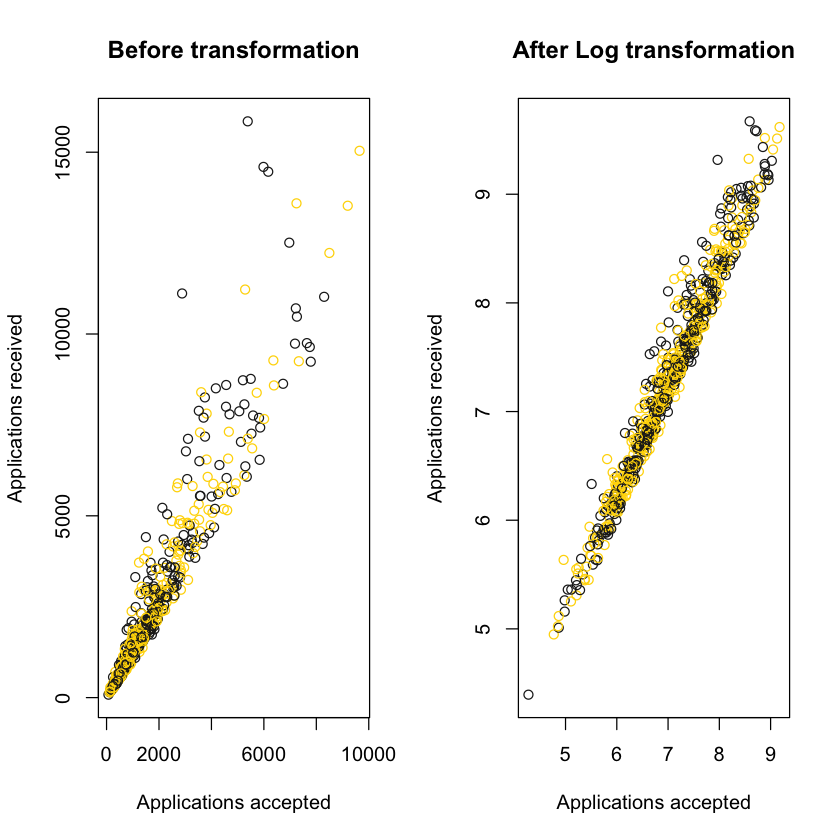

In [30]:
par(mfrow = c(1,2))
plot(college_data$Apps ~ college_data$Accept, pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received", main="Before transformation")
plot(log(college_data$Apps) ~ log(college_data$Accept), pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received",main="After Log transformation")

> **Originally when scatter plot is applied between applications received and accepted , data points are more scattered. We can see after applying logarithimic transfromation, data points are in line**

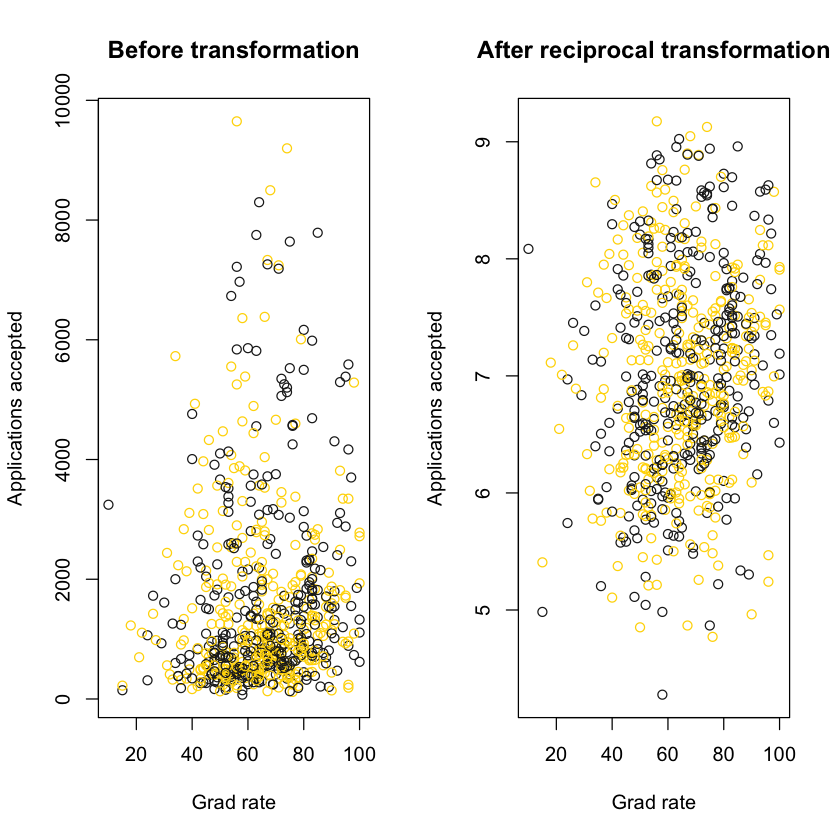

In [31]:
par(mfrow = c(1,2))
plot(college_data$Accept ~ college_data$Grad.Rate, pch =1, col =c("gold","gray12"),xlab="Grad rate",ylab = "Applications accepted", main="Before transformation")

plot(log(college_data$Accept) ~ (1/(college_data$Grad.Rate)), pch =1, col =c("gold","gray12"),xlab="Grad rate",ylab = "Applications accepted",main="After reciprocal transformation")

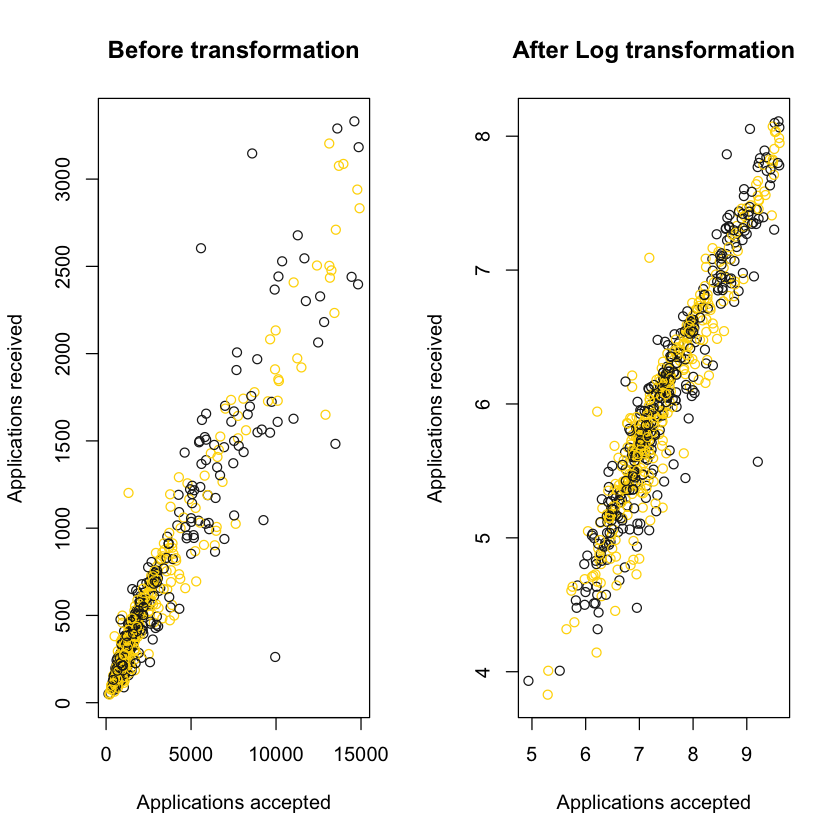

In [32]:
par(mfrow = c(1,2))
plot(college_data$Enroll ~ college_data$F.Undergrad, pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received", main="Before transformation")
plot(log(college_data$Enroll) ~ log(college_data$F.Undergrad), pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received",main="After Log transformation")

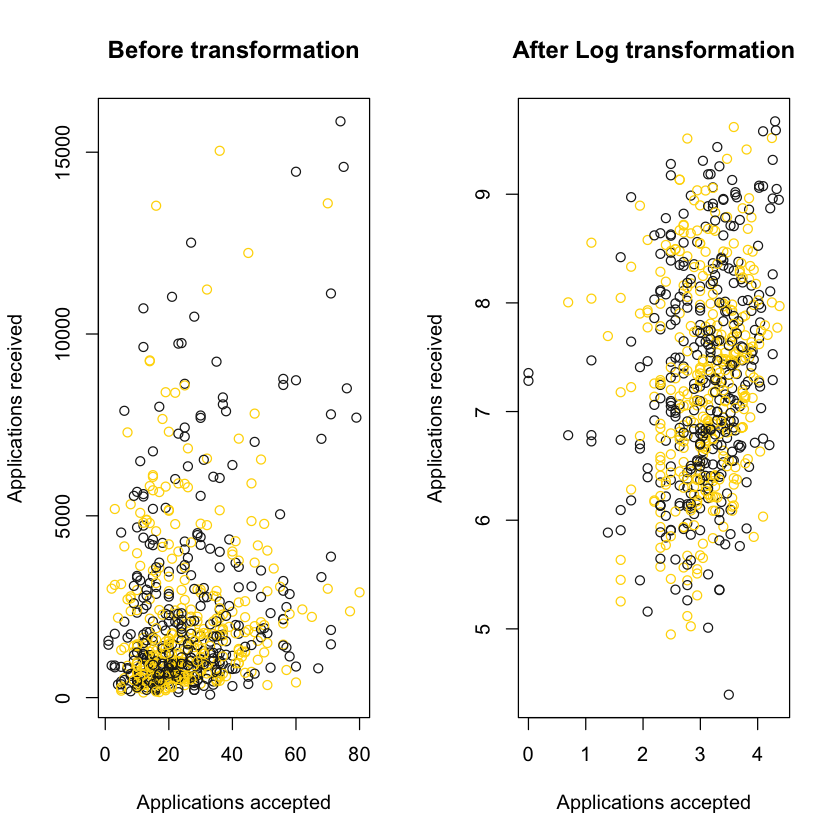

In [33]:
par(mfrow = c(1,2))
plot(college_data$Apps ~ college_data$Top10perc, pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received", main="Before transformation")
plot(log(college_data$Apps) ~ log(college_data$Top10perc), pch =1, col =c("gold","gray12"),xlab="Applications accepted",ylab = "Applications received",main="After Log transformation")

> **When histograms are drawn, we can observe right/left skewness in the distributions. To minimize that,
Taking roots, logarithms, or reciprocals are effective ways to minimize right skewness in the distribution.
Taking squares, cubes, or higher powers can help minimize left skewness.**

In [34]:
college_data$Apps = log(college_data$Apps)
college_data$Accept = log(college_data$Accept)
college_data$Enroll = (college_data$Enroll)^(1/3)
college_data$Top10perc = sqrt(college_data$Top10perc)
college_data$F.Undergrad = log(college_data$F.Undergrad )
college_data$P.Undergrad = log(college_data$P.Undergrad )
college_data$Expend = (college_data$Expend)^(1/3)
college_data$Personal = log(college_data$Personal)
college_data$Books = (college_data$Books)^(1/3)

In [35]:
college_data$PhD = (college_data$PhD)^2
college_data$Terminal = (college_data$Terminal)^2

In [36]:
str(college_data)

'data.frame':	676 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  7.41 7.26 6.03 5.26 6.38 ...
 $ Accept     : num  7.12 7 5.86 4.98 6.17 ...
 $ Enroll     : num  8.97 6.95 5.16 3.8 5.41 ...
 $ Top10perc  : num  4.8 4.69 7.75 4 6.16 ...
 $ Top25perc  : num  52 50 89 44 62 45 68 63 44 75 ...
 $ F.Undergrad: num  7.97 6.94 6.23 5.52 6.52 ...
 $ P.Undergrad: num  6.29 4.6 4.14 6.77 3.71 ...
 $ Outstate   : num  7440 11250 12960 7560 13500 ...
 $ Room.Board : num  3300 3750 5450 4120 3335 ...
 $ Books      : num  7.66 7.37 7.66 9.28 7.94 ...
 $ Personal   : num  7.7 7.06 6.77 7.31 6.51 ...
 $ PhD        : num  4900 2809 8464 5776 4489 ...
 $ Terminal   : num  6084 4356 9409 5184 5329 ...
 $ S.F.Ratio  : num  18.1 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 11.3 ...
 $ perc.alumni: num  12 30 37 2 11 26 37 23 15 31 ...
 $ Expend     : num  19.2 20.6 26.7 22.2 21.3 ...
 $ Grad.Rate  : num  60 54 59 15 55 63 73 80 52 73 ...


> **Looking at the structure of the data**

**(a) Split the data set into a training set and a test set. Fit a linear model using least
squares on the training set, and report the test error obtained.**

In [37]:
set.seed(111)
sample_size = floor(0.80*nrow(college_data))
sample_size


[1] 540

In [38]:
training_set_index = sample(seq_len(nrow(college_data)), size = sample_size)
train.Data = college_data[training_set_index,] 
head(train.Data)
dim(train.Data)

Private Apps     Accept   Enroll    Top10perc Top25perc
SUNY College at Buffalo No      8.578853 8.164795 10.082648 2.828427  29       
Fairfield University    Yes     8.473032 8.115521  9.209096 5.477226  66       
Calvin College          Yes     7.486613 7.321189  9.701158 5.385165  56       
University of Oregon    No      9.063116 8.814628 13.654825 5.000000  61       
Marquette University    Yes     8.547140 8.433812 11.899626 6.000000  71       
Bethel College KS       Yes     5.308268 5.214936  4.959676 4.358899  42       
                        F.Undergrad P.Undergrad Outstate Room.Board Books   
SUNY College at Buffalo 8.939319    7.645398     6550    4040       8.193213
Fairfield University    8.001020    6.944087    15000    6200       8.879040
Calvin College          8.131825    4.912655    10230    3710       7.368063
University of Oregon    9.364691    7.380879    10602    3660       8.291344
Marquette University    8.855949    6.689599    11610    4760       8.434327
Bethel College KS       6.285998    4.615121     8540    3580       7.937005
                        Personal PhD  Terminal S.F.Ratio perc.alumni Expend  
SUNY College at Buffalo 7.114769 5041 6084     18.7      12          19.58390
Fairfield University    7.003065 7396 8100     15.1      30          22.38709
Calvin College          7.098376 5625 6561     14.8      41          19.82005
University of Oregon    7.333023 6241 7569     19.7      13          20.01665
Marquette University    7.575585 7396 8836     13.5      25          21.53141
Bethel College KS       7.244228 3721 6400      8.8      32          20.26643
                        Grad.Rate
SUNY College at Buffalo 42       
Fairfield University    94       
Calvin College          81       
University of Oregon    54       
Marquette University    77       
Bethel College KS       56

[1] 540  18

In [39]:
test.Data = college_data[-training_set_index,] 
head(test.Data)
dim(test.Data)

Private Apps     Accept   Enroll   Top10perc
Abilene Christian University    Yes     7.414573 7.116394 8.966957 4.795832 
Albion College                  Yes     7.549083 7.450080 7.878368 6.082763 
Arkansas College (Lyon College) Yes     6.562444 5.811141 5.495865 6.782330 
Averett College                 Yes     6.440947 6.320768 5.561298 4.000000 
Barat College                   Yes     5.564520 5.257495 4.805896 3.872983 
Beaver College                  Yes     7.058758 6.745236 7.033850 4.795832 
                                Top25perc F.Undergrad P.Undergrad Outstate
Abilene Christian University    52        7.967280    6.285998     7440   
Albion College                  68        7.374002    3.465736    13868   
Arkansas College (Lyon College) 74        6.272877    5.204007     8644   
Averett College                 40        6.655440    6.287859     9925   
Barat College                   36        6.115892    5.583496     9690   
Beaver College                  56        6.777647    6.251904    12850   
                                Room.Board Books    Personal PhD  Terminal
Abilene Christian University    3300       7.663094 7.696213 4900  6084   
Albion College                  4826       7.663094 6.745236 7921 10000   
Arkansas College (Lyon College) 3922       7.937005 6.684612 6241  7744   
Averett College                 4135       9.085603 7.207860 3481  4489   
Barat College                   4300       7.937005 6.214608 3249  5929   
Beaver College                  5400       7.368063 6.684612 6084  7921   
                                S.F.Ratio perc.alumni Expend   Grad.Rate
Abilene Christian University    18.1      12          19.16659 60       
Albion College                  13.7      37          22.56328 73       
Arkansas College (Lyon College) 12.6      24          24.42920 54       
Averett College                 22.4      11          18.68454 48       
Barat College                    9.7      35          21.05729 71       
Beaver College                  12.2      30          20.76534 73

[1] 136  18

> **I have split 70% of the data into training (473 observations) and 30% into testing (203 observations)**

**Fitting Linear model**

In [40]:
linear.Model =  lm(Apps ~ ., data = train.Data)

summary(linear.Model)



Call:
lm(formula = Apps ~ ., data = train.Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40080 -0.10933 -0.03165  0.08286  0.68253 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.228e-01  2.414e-01  -3.823 0.000148 ***
PrivateYes  -1.130e-01  2.938e-02  -3.845 0.000136 ***
Accept       1.083e+00  2.422e-02  44.716  < 2e-16 ***
Enroll      -4.620e-02  1.273e-02  -3.630 0.000311 ***
Top10perc    4.366e-03  1.362e-02   0.321 0.748624    
Top25perc    2.673e-03  1.009e-03   2.649 0.008326 ** 
F.Undergrad  3.996e-02  2.964e-02   1.348 0.178268    
P.Undergrad -8.869e-03  6.843e-03  -1.296 0.195508    
Outstate    -1.172e-05  4.134e-06  -2.835 0.004766 ** 
Room.Board   2.711e-05  1.012e-05   2.679 0.007613 ** 
Books        4.038e-02  1.223e-02   3.301 0.001029 ** 
Personal    -6.610e-03  1.760e-02  -0.376 0.707419    
PhD          2.849e-06  7.378e-06   0.386 0.699546    
Terminal    -1.201e-05  7.196e-06  -1.669 0.095765 .  
S.F.Rat

In [41]:
linearModel.Predict = predict(linear.Model,test.Data)

mean.Square.Error = mean((linearModel.Predict-test.Data$Apps)**2)
mean.Square.Error

[1] 0.03612059

> **Mean square error obtained by fitting linear model to the dataset is 0.0308398555114026**

**(b) Fit a ridge regression model on the training set, with λ chosen by crossvalidation.
Report the test error obtained.**

In [42]:
#install.packages("glmnet")

In [43]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [44]:
#Train data matrix model
college_X <- model.matrix(Apps ~ ., data = college_data)[,-1]
head(college_X)

PrivateYes Accept   Enroll   Top10perc Top25perc
Abilene Christian University 1          7.116394 8.966957 4.795832  52       
Adrian College               1          7.000334 6.952053 4.690416  50       
Agnes Scott College          1          5.855072 5.155137 7.745967  89       
Alaska Pacific University    1          4.983607 3.802952 4.000000  44       
Albertson College            1          6.171701 5.406120 6.164414  62       
Albertus Magnus College      1          5.828946 4.687548 4.123106  45       
                             F.Undergrad P.Undergrad Outstate Room.Board
Abilene Christian University 7.967280    6.285998     7440    3300      
Adrian College               6.943122    4.595120    11250    3750      
Agnes Scott College          6.234411    4.143135    12960    5450      
Alaska Pacific University    5.517453    6.767343     7560    4120      
Albertson College            6.519147    3.713572    13500    3335      
Albertus Magnus College      6.030685    5.438079    13290    5720      
                             Books    Personal PhD  Terminal S.F.Ratio
Abilene Christian University 7.663094 7.696213 4900 6084     18.1     
Adrian College               7.368063 7.060476 2809 4356     12.9     
Agnes Scott College          7.663094 6.774224 8464 9409      7.7     
Alaska Pacific University    9.283178 7.313220 5776 5184     11.9     
Albertson College            7.937005 6.514713 4489 5329      9.4     
Albertus Magnus College      7.937005 7.313220 8100 8649     11.5     
                             perc.alumni Expend   Grad.Rate
Abilene Christian University 12          19.16659 60       
Adrian College               30          20.59464 54       
Agnes Scott College          37          26.69150 59       
Alaska Pacific University     2          22.18711 15       
Albertson College            11          21.34648 55       
Albertus Magnus College      26          20.69320 63

In [45]:
college_Y <- college_data$Apps
head(college_Y)

[1] 7.414573 7.264030 6.033086 5.262690 6.375025 5.866468

In [46]:
ridgeRegression.Model = glmnet(college_X,college_Y,alpha=0)
ridgeRegression.Model


Call:  glmnet(x = college_X, y = college_Y, alpha = 0) 

       Df      %Dev    Lambda
  [1,] 17 7.232e-36 947.80000
  [2,] 17 7.958e-03 863.60000
  [3,] 17 8.728e-03 786.90000
  [4,] 17 9.572e-03 717.00000
  [5,] 17 1.050e-02 653.30000
  [6,] 17 1.151e-02 595.20000
  [7,] 17 1.262e-02 542.30000
  [8,] 17 1.384e-02 494.20000
  [9,] 17 1.517e-02 450.30000
 [10,] 17 1.662e-02 410.30000
 [11,] 17 1.822e-02 373.80000
 [12,] 17 1.996e-02 340.60000
 [13,] 17 2.187e-02 310.40000
 [14,] 17 2.396e-02 282.80000
 [15,] 17 2.624e-02 257.70000
 [16,] 17 2.874e-02 234.80000
 [17,] 17 3.146e-02 213.90000
 [18,] 17 3.444e-02 194.90000
 [19,] 17 3.768e-02 177.60000
 [20,] 17 4.123e-02 161.80000
 [21,] 17 4.509e-02 147.40000
 [22,] 17 4.929e-02 134.30000
 [23,] 17 5.387e-02 122.40000
 [24,] 17 5.885e-02 111.50000
 [25,] 17 6.427e-02 101.60000
 [26,] 17 7.014e-02  92.60000
 [27,] 17 7.652e-02  84.37000
 [28,] 17 8.343e-02  76.88000
 [29,] 17 9.091e-02  70.05000
 [30,] 17 9.900e-02  63.82000
 [31,] 17 1.

In [47]:
names(ridgeRegression.Model)
dim(coef(ridgeRegression.Model))

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

[1]  18 100

>**names and dimension of coeff of the ridge regression model**

**Looking at different Lambdas**

In [48]:
ridgeRegression.Model$lambda[3]
coef(ridgeRegression.Model)[,3]
l2_norm = sqrt(sum(coef(ridgeRegression.Model)[2:16,3]^2))
l2_norm


[1] 786.8542

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
 7.246290e+00 -1.214360e-03  1.296297e-03  4.572848e-04  2.035467e-04 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.053465e-05  1.141280e-03  2.562577e-04  3.129404e-08  1.949429e-07 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.666114e-04  3.227135e-04  2.625722e-07  2.465523e-07  8.034730e-05 
  perc.alumni        Expend     Grad.Rate 
-1.009504e-05  8.381561e-05  1.362689e-05

[1] 0.002226206

In [49]:
ridgeRegression.Model$lambda[30]
coef(ridgeRegression.Model)[,30]
l2_norm = sqrt(sum(coef(ridgeRegression.Model)[2:16,30]^2))
l2_norm

[1] 63.82417

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
 6.864342e+00 -1.407350e-02  1.521733e-02  5.344620e-03  2.336286e-03 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.366330e-04  1.332382e-02  2.967411e-03  3.667521e-07  2.275726e-06 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 3.066116e-03  3.714816e-03  3.021127e-06  2.834549e-06  9.400855e-04 
  perc.alumni        Expend     Grad.Rate 
-1.177572e-04  9.677955e-04  1.595120e-04

[1] 0.02596417

In [50]:
ridgeRegression.Model$lambda[65]
coef(ridgeRegression.Model)[,65]
l2_norm = sqrt(sum(coef(ridgeRegression.Model)[2:16,65]^2))
l2_norm

[1] 2.459483

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
 2.947200e+00 -1.256492e-01  1.861043e-01  5.880918e-02  1.839651e-02 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.036063e-03  1.428172e-01  2.466633e-02  4.865113e-06  2.621960e-05 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.517370e-02  2.757441e-02  2.419317e-05  2.226033e-05  9.924823e-03 
  perc.alumni        Expend     Grad.Rate 
-1.105115e-03  9.386684e-03  1.858271e-03

[1] 0.2769884

In [51]:
ridgeRegression.Model$lambda[100]
coef(ridgeRegression.Model)[,100]
l2_norm = sqrt(sum(coef(ridgeRegression.Model)[2:16,100]^2))
l2_norm

[1] 0.09477687

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
 1.132611e-01 -8.188289e-02  6.371301e-01  6.668802e-02  1.330874e-03 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.425649e-03  1.516309e-01 -1.316059e-02  2.880016e-06  5.376270e-05 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.916991e-02 -4.657224e-03  5.893975e-06  3.007844e-06  9.563988e-03 
  perc.alumni        Expend     Grad.Rate 
-1.426662e-03  1.339960e-02  2.501035e-03

[1] 0.6642483

**Predict the model for a "new value" of lambda**

In [52]:
predict(ridgeRegression.Model, s = .0005, type = "coefficient")

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  1.132611e-01
PrivateYes  -8.188289e-02
Accept       6.371301e-01
Enroll       6.668802e-02
Top10perc    1.330874e-03
Top25perc    2.425649e-03
F.Undergrad  1.516309e-01
P.Undergrad -1.316059e-02
Outstate     2.880016e-06
Room.Board   5.376270e-05
Books        2.916991e-02
Personal    -4.657224e-03
PhD          5.893975e-06
Terminal     3.007844e-06
S.F.Ratio    9.563988e-03
perc.alumni -1.426662e-03
Expend       1.339960e-02
Grad.Rate    2.501035e-03

> **Predicts almost similar to the original data**

In [53]:
predict(ridgeRegression.Model, s = .5, type = "coefficient")

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  9.919123e-01
PrivateYes  -1.199118e-01
Accept       3.653902e-01
Enroll       8.666486e-02
Top10perc    1.324969e-02
Top25perc    2.206509e-03
F.Undergrad  1.994381e-01
P.Undergrad  1.142903e-02
Outstate     8.540173e-06
Room.Board   4.484280e-05
Books        2.778007e-02
Personal     1.450320e-02
PhD          1.862561e-05
Terminal     1.585160e-05
S.F.Ratio    1.274494e-02
perc.alumni -1.292534e-03
Expend       1.314845e-02
Grad.Rate    2.729607e-03

**Model Selection**

In [54]:
set.seed(111)
train_indexes = sample(1:nrow(college_X), round(0.8*nrow(college_X)))
train_indexes


[1] 507 175  69 584 305  45 586 334 602 281 625 135 405 143 649  40  25 455
 [19] 180 100 540  38 660 436 479 197 421 454 657 320  92 210 186 568  61  91
 [37] 605 373 493 252 170 592  42 423 388 308 113 641 310 408 400 557  27 349
 [55] 122 606 316  58 385 601 490 410 147 289 473 646 459 351 518  95 134 588
 [73] 530 582 269 564 658 415 120 534 508 596 621 283 659 497 426 152 215  13
 [91]  87  50 612  70 506 268 342 546 172 336 223 169  90 300 521 603  67  48
[109] 155 362 266 163 353 230 451 457 199 515 331 340 608 372 168 358 374 253
[127] 217  19 299 631 598 522  12  63 469 578 573 398 599 286 669 575 246   6
[145] 106 594 195 409 401 551 367  16 128 418  30 103 496  78 652 453 190 211
[163] 127 284 464 672 240 339  51 634 478 259 219 347  56 322 220 326 229 171
[181] 667 460 216 628 162 206 311 444 630  76 633 130 462 431  18  34   8 480
[199] 655 292 369 279   3 337 212 116 525 204 637 232 303 285 132  26 585 566
[217] 346 635 562 629 656 450 461  47 580 249 419 583  14 144 272 639 547 545
[235] 274 519 616 501 500 194 184   5 632 382 486 328 623 484 133  81 119 636
[253] 556 237 117 438 256 277 341  55 411  39 619 626 258 539 554 485 141 604
[271] 207 476 610 105 142 404 569 357 297 537 440 244  29 567 214 579 202 494
[289] 653 140 607 343 662 193 323 472 213 264 611  23 332 313  41  85 456 200
[307] 263 235  71 173 315 417 520 654 571 402 638 319 321 221  17 306 531  97
[325] 209 413  79 403  60 613 617 267 644 511 552 304  53 153  11  59 532 378
[343] 437  22 439  10 158  49 361 176 481   9 154 224 425 123 549 452 118 676
[361] 643  86 183 225 102 185 505 165 161  82 650  32 675 471 290 523 487 664
[379]  68 406 159 434 126 350 192 572  80 390 293 317 510 376 251 188  72 111
[397] 191 270 509 543  84 295 600 157 146 445 348 150 615 314 475   4 138 208
[415] 226 593 587  75 433 624 271 245 561 318  73 327 352 442 622 446 640 359
[433] 137 663 416 109 187 627  20 139 360 651  57 294 449 291 387 536 432  93
[451] 407 420 618 391  15 514 282 468 179 502 368 124 447  37 181  99 642 298
[469] 189 529 384 218  33 247 129 443  52 597 499 354 544 280 614 482 492 428
[487] 666 527  65 528 392 533  54 110 345 389 114 203 248 324  66 379 288 576
[505]  74 228 174 591 333 541 399 238 287 553 309 344 661 422 548 262 424 166
[523] 427 448 581 375  62 589   2 178  46 563 364  94 366 673 467  24 261 302
[541] 538

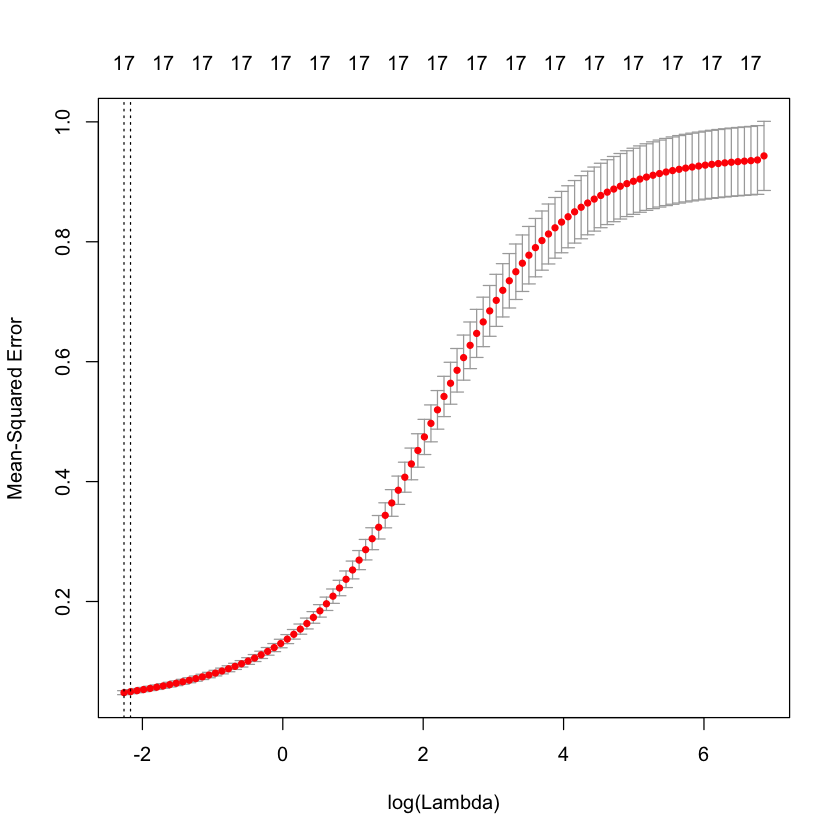

In [55]:
cv.out = cv.glmnet(college_X[train_indexes,], college_Y[train_indexes], alpha = 0)
plot(cv.out)

In [56]:
names(cv.out)

[1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "name"       "glmnet.fit" "lambda.min" "lambda.1se"

In [57]:

bestlam = cv.out$lambda.min
bestlam

[1] 0.1041248

In [58]:
ridge.pred = predict(ridgeRegression.Model, s = bestlam, newx = college_X[-train_indexes,], type = "response")

In [59]:
y_hat = ridge.pred
y_true = college_Y[-train_indexes]
ridge.Error = mean((y_hat - y_true)^2)
ridge.Error

[1] 0.04289285

> **Mean square error for ridge model is slightly more compared to the MSE in linear model**

**(d) Fit a lasso model on the training set, with λ chosen by cross-validation.
Report the test error obtained, along with the number of non-zero coefficient
estimates.**

In [60]:

lasso.model <- glmnet(college_X[train_indexes,], college_Y[train_indexes], alpha = 1)


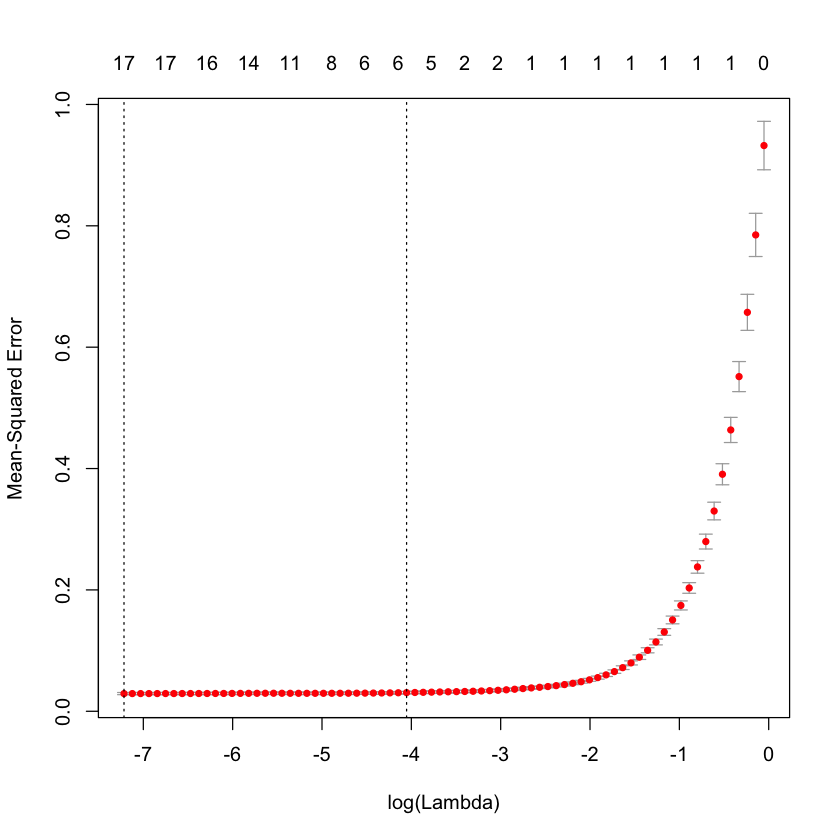

In [61]:
set.seed(1121)
cv.out <- cv.glmnet(college_X[train_indexes, ], college_Y[train_indexes], alpha = 1)
plot(cv.out)

**Looking at different co-efficients**

In [62]:
lasso.model$lambda[50]
coef(lasso.model)[,50]

lasso.model$lambda[70]
coef(lasso.model)[,70]

[1] 0.009939218

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-2.122754e-01 -7.134560e-02  1.011560e+00  0.000000e+00  0.000000e+00 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.227434e-03  0.000000e+00  0.000000e+00  0.000000e+00  1.069613e-05 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.723607e-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
  perc.alumni        Expend     Grad.Rate 
 0.000000e+00  0.000000e+00  1.363634e-03

[1] 0.00154622

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-5.968487e-01 -1.082492e-01  1.053881e+00 -2.199322e-02  1.279465e-03 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
 2.817342e-03  6.270370e-03 -5.570674e-03 -7.296834e-06  2.542843e-05 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 3.883248e-02 -4.711164e-03  0.000000e+00 -6.554729e-06  2.960486e-03 
  perc.alumni        Expend     Grad.Rate 
-1.011754e-03  7.097251e-03  2.346197e-03

In [63]:
#Best lambda
cv.out = cv.glmnet(college_X[train_indexes,], college_Y[train_indexes], alpha = 1)
bestlam = cv.out$lambda.min

lasso.pred <- predict(lasso.model, s = bestlam, newx = college_X[-train_indexes,], type = "response")

y_hat_lasso <- lasso.pred
y_true <- college_Y[-train_indexes]

lasso.Error <- mean((y_hat_lasso-y_true)^2) 
lasso.Error

[1] 0.03595419

> **Mean square Error of lasso is less compared to both Ridge and Linear models**

**(g) Comment more generally on the results obtained. How accurately can we
predict the number of college applications received? Is there much difference
among the test errors resulting from these five approaches?**

In [64]:
test.avg <-  mean(test.Data[, "Apps"])
test.avg

# Accuracy of Lm model
lm.test.r2 <-  1 - (mean.Square.Error /mean((test.Data[, "Apps"] - test.avg)^2))
lm.test.r2

[1] 7.386353

[1] 0.9606907

In [65]:
#Accuracy for ridge
ridge.test.r2 <-  1 - (ridge.Error/mean((test.Data[, "Apps"] - test.avg)^2))

ridge.test.r2

[1] 0.9533206

In [66]:
#Accuracy for lasso
lasso.test.r2 <-  1 - (lasso.Error /mean((test.Data[, "Apps"] - test.avg)^2))

lasso.test.r2

[1] 0.9608718

 > **CONCLUSION :**<font color='red'>**All three models perform equally best on given data, there is no much different in test errors obtained.**</font> 

# Question 2
_**The insurance company benchmark data set gives information on customers.
Specifically, it contains 86 variables on product-usage data and socio-demographic
data derived from zip area codes. There are 5,822 customers in the training set and
another 4,000 in the test set. The data were collected to answer the following
questions: Can you predict who will be interested in buying a caravan insurance
policy and give an explanation why? Compute the OLS estimates and compare
them with those obtained from the following variable-selection algorithms:
Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression.
What methods performed the best in the prediction?
(The data can be downloaded from https://kdd.ics.uci.edu/databases/tic/tic.html. )**_

**About the data and Variables**


Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) and product ownership (attributes 44-86) <br />
1	STYPE	Customer Subtype <br />
2	MAANTHUI	Number of houses 1 - 10 <br />
3	MGEMOMV	Avg size household 1 - 6 <br />
4	MGEMLEEF	Average age <br />
5	MOSHOOFD	Customer main type <br />
6	MGODRK	Roman catholic<br />
7	MGODPR	Protestant ...<br />
8	MGODOV	Other religion<br />
9	MGODGE	No religion<br />
10	MRELGE	Married<br />
11	MRELSA	Living together<br />
12	MRELOV	Other relation<br />
13	MFALLEEN	Singles<br />
14	MFGEKIND	Household without children<br />
15	MFWEKIND	Household with children<br />
16	MOPLHOOG	High level education<br />
17	MOPLMIDD	Medium level education<br />
18	MOPLLAAG	Lower level education<br />
19	MBERHOOG	High status<br />
20	MBERZELF	Entrepreneur<br />
21	MBERBOER	Farmer<br />
22	MBERMIDD	Middle management<br />
23	MBERARBG	Skilled labourers<br />
24	MBERARBO	Unskilled labourers<br />
25	MSKA	Social class A<br />
26	MSKB1	Social class B1<br />
27	MSKB2	Social class B2<br />
28	MSKC	Social class C<br />
29	MSKD	Social class D<br />
30	MHHUUR	Rented house<br />
31	MHKOOP	Home owners<br />
32	MAUT1	1 car<br />
33	MAUT2	2 cars<br />
34	MAUT0	No car<br />
35	MZFONDS	National Health Service<br />
36	MZPART	Private health insurance<br />
37	MINKM30	Income >30.000<br />
38	MINK3045	Income 30-45.000<br />
39	MINK4575	Income 45-75.000<br />
40	MINK7512	Income 75-122.000<br />
41	MINK123M	Income <123.000<br />
42	MINKGEM	Average income<br />
43	MKOOPKLA	Purchasing power class<br />
44	PWAPART	Contribution private third party insurance<br />
45	PWABEDR	Contribution third party insurance (firms)<br />
46	PWALAND	Contribution third party insurance (agriculture)<br />
47	PPERSAUT	Contribution car policies<br />
48	PBESAUT	Contribution delivery van policies<br />
49	PMOTSCO	Contribution motorcycle/scooter policies<br />
50	PVRAAUT	Contribution lorry policies<br />
51	PAANHANG	Contribution trailer policies<br />
52	PTRACTOR	Contribution tractor policies<br />
53	PWERKT	Contribution agricultural machines policies<br />
54	PBROM	Contribution moped policies<br />
55	PLEVEN	Contribution life insurances<br />
56	PPERSONG	Contribution private accident insurance policies<br />
57	PGEZONG	Contribution family accidents insurance policies<br />
58	PWAOREG	Contribution disability insurance policies<br />
59	PBRAND	Contribution fire policies<br />
60	PZEILPL	Contribution surfboard policies<br />
61	PPLEZIER	Contribution boat policies<br />
62	PFIETS	Contribution bicycle policies<br />
63	PINBOED	Contribution property insurance policies<br />
64	PBYSTAND	Contribution social security insurance policies<br />
65	AWAPART	Number of private third party insurance 1 - 12<br />
66	AWABEDR	Number of third party insurance (firms) ...<br />
67	AWALAND	Number of third party insurance (agriculture)<br />
68	APERSAUT	Number of car policies<br />
69	ABESAUT	Number of delivery van policies<br />
70	AMOTSCO	Number of motorcycle/scooter policies<br />
71	AVRAAUT	Number of lorry policies<br />
72	AAANHANG	Number of trailer policies<br />
73	ATRACTOR	Number of tractor policies<br />
74	AWERKT	Number of agricultural machines policies<br />
75	ABROM	Number of moped policies<br />
76	ALEVEN	Number of life insurances<br />
77	APERSONG	Number of private accident insurance policies<br />
78	AGEZONG	Number of family accidents insurance policies<br />
79	AWAOREG	Number of disability insurance policies<br />
80	ABRAND	Number of fire policies<br />
81	AZEILPL	Number of surfboard policies<br />
82	APLEZIER	Number of boat policies<br />
83	AFIETS	Number of bicycle policies<br />
84	AINBOED	Number of property insurance policies<br />
85	ABYSTAND	Number of social security insurance policies<br />
86	CARAVAN	Number of mobile home policies 0 - 1

**Loding the training data from the site (The Insurance Company Benchmark (COIL 2000))**

In [67]:
ICB.Train = read.csv("http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt",header=FALSE,sep="	")
head(ICB.Train,10)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 ... V77 V78 V79 V80 V81 V82 V83 V84 V85 V86
1  33 1  3  2   8 0  5  1  3  7   ... 0   0   0   1   0   0   0   0   0   0  
2  37 1  2  2   8 1  4  1  4  6   ... 0   0   0   1   0   0   0   0   0   0  
3  37 1  2  2   8 0  4  2  4  3   ... 0   0   0   1   0   0   0   0   0   0  
4   9 1  3  3   3 2  3  2  4  5   ... 0   0   0   1   0   0   0   0   0   0  
5  40 1  4  2  10 1  4  1  4  7   ... 0   0   0   1   0   0   0   0   0   0  
6  23 1  2  1   5 0  5  0  5  0   ... 0   0   0   0   0   0   0   0   0   0  
7  39 2  3  2   9 2  2  0  5  7   ... 0   0   0   0   0   0   0   0   0   0  
8  33 1  2  3   8 0  7  0  2  7   ... 0   0   0   0   0   0   0   0   0   0  
9  33 1  2  4   8 0  1  3  6  6   ... 0   0   0   0   0   0   0   0   0   0  
10 11 2  3  3   3 3  5  0  2  7   ... 0   0   0   1   0   0   0   0   0   0

In [68]:
dim(ICB.Train)

[1] 5822   86

In [69]:
library(ROSE)

Loaded ROSE 0.0-3



In [70]:
prop.table(table(ICB.Train$V86))


         0          1 
0.94022673 0.05977327 

> **We can see that is data is <font color ="red" > extremely imbalanced </font>, that is data set contains 94% of negative cases and 6% of positive cases**

> **If my train set is this im-balanced, after model fitting test results also follow the samre trait. So, ill go for <font color = "red">oversampling </font> the train data.**

In [71]:
os_train_data = ovun.sample(V86 ~ ., data = ICB.Train, method = "over",N =11644 )$data
dim(os_train_data)

[1] 11644    86

> **I have considered over sampling of the data (double rows of original train set 5822 --> 11644 )**

In [72]:
prop.table(table(os_train_data$V86))


        0         1 
0.4701134 0.5298866 

> **We can see that after oversampling, there is an good proportion of positive and negative cases**

> **The dimension of new ICB training data is 11644 x 86**

In [73]:
ICB.Test_without_target = read.csv("http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt",header=FALSE,sep="	")


In [74]:
ICB.Test_target = read.csv("http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt",header=FALSE,sep="	")
colnames(ICB.Test_target) = "V86"


In [75]:
ICB.Test = cbind(ICB.Test_without_target,ICB.Test_target["V86"])
head(ICB.Test,10)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 ... V77 V78 V79 V80 V81 V82 V83 V84 V85 V86
1  33 1  4  2  8  0  6  0  3  5   ... 0   0   0   1   0   0   0   0   0   0  
2   6 1  3  2  2  0  5  0  4  5   ... 0   0   0   1   0   0   0   0   0   1  
3  39 1  3  3  9  1  4  2  3  5   ... 0   0   0   1   0   0   0   0   0   0  
4   9 1  2  3  3  2  3  2  4  5   ... 0   0   0   1   0   0   0   0   0   0  
5  31 1  2  4  7  0  2  0  7  9   ... 0   0   0   1   0   0   0   0   0   0  
6  30 1  2  4  7  1  4  2  3  5   ... 0   0   0   2   0   0   0   0   0   0  
7  35 1  2  4  8  2  5  1  2  8   ... 0   0   0   1   0   0   0   0   0   0  
8   6 1  3  3  2  3  4  2  2  9   ... 0   0   0   0   0   0   0   0   0   0  
9   4 1  2  4  1  0  7  2  0  9   ... 0   0   0   1   0   0   0   0   0   0  
10 10 1  4  2  3  0  7  0  2  9   ... 0   0   0   1   0   0   0   0   1   0

In [76]:
dim(ICB.Test)

[1] 4000   86

> **The dimension of ICB testing data is 4000 x 86**

In [77]:
ICB.Fulldata = rbind(os_train_data,ICB.Test)
dim(ICB.Fulldata)
ICB.Fulldata = ICB.Fulldata[sample(1:nrow(ICB.Fulldata)), ]
head(ICB.Fulldata)

[1] 15644    86

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 ... V77 V78 V79 V80 V81 V82 V83 V84 V85
11765 34 1  3  3  8  0  2  2  5  7   ... 0   0   0   0   0   0   0   0   0  
12531 33 1  3  2  8  0  3  1  5  6   ... 0   0   0   1   0   0   0   0   0  
13995  5 1  2  4  1  0  5  2  3  5   ... 0   0   0   1   0   0   0   0   0  
7345  10 1  4  3  3  5  3  1  1  8   ... 0   0   0   1   0   0   0   0   0  
715   23 1  2  2  5  2  4  2  4  7   ... 0   0   0   1   0   0   0   0   0  
10918 33 1  2  4  8  0  6  0  3  6   ... 0   0   0   1   0   0   0   0   0  
      V86
11765 0  
12531 0  
13995 0  
7345  1  
715   0  
10918 1

> **Full data of ICB with 15644 x 86**

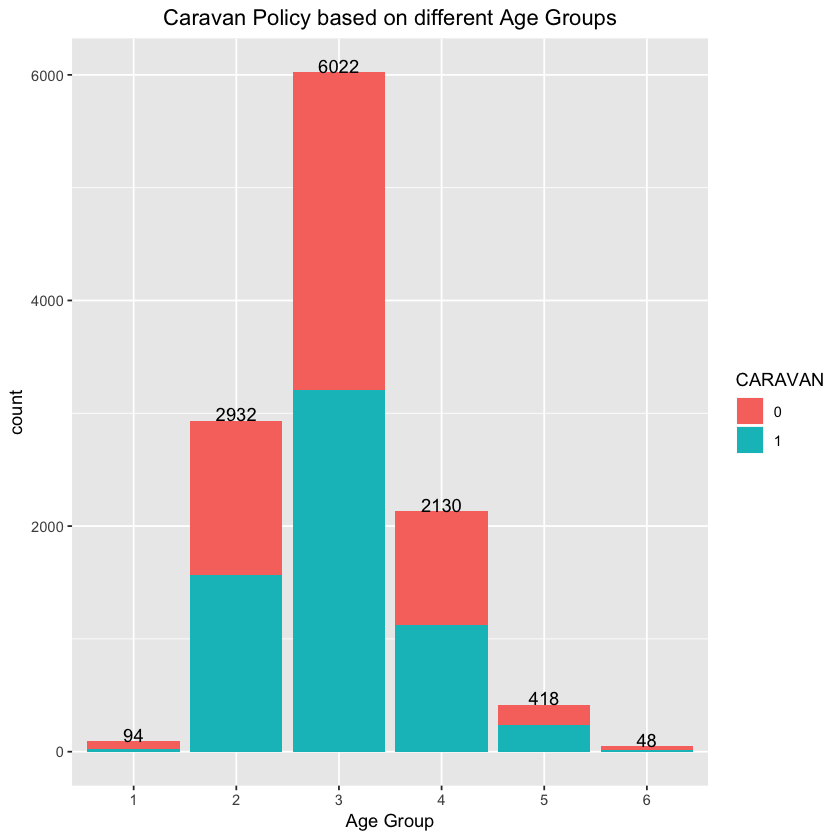

In [130]:
ggplot(os_train_data,aes(factor(V4)),col ="red") + 
    geom_bar(aes(fill = factor(V86))) + 
    geom_text(stat='count', aes(label=..count..), vjust=0) + 
    labs(x="Age Group") +
    scale_fill_discrete(name = "CARAVAN") + 
    ggtitle("Caravan Policy based on different Age Groups") +
    theme(plot.title = element_text(hjust = 0.5))

In [122]:

# Number of customers who purchased caravan policy in age group 2
nrow(os_train_data[os_train_data$V4 == 2 & os_train_data$V86 == 1,])

# Number of customers who purchased caravan policy in age group 3
nrow(os_train_data[os_train_data$V4 == 3 & os_train_data$V86 == 1,])

# Number of customers who purchased caravan policy in age group 4
nrow(os_train_data[os_train_data$V4 == 4 & os_train_data$V86 == 1,])

[1] 1567

[1] 3205

[1] 1121

In [124]:
age_group <- unique(os_train_data$V4)

age_group_ratio <- data.frame('age_group' = NULL, 'ratio' = NULL)

for (i in 1:length(age_group)){
    total_customer <- nrow(os_train_data[os_train_data$V4 == os_train_data[i],])
    bought <- nrow(os_train_data[os_train_data$V4 == age_group[i] & os_train_data$V86 == 1,])
    age_group_ratio[i, "age_group"] <- age_group[i]
    age_group_ratio[i, "ratio"] <- round((bought / total_customer) * 100 , 2)
}

In [125]:
age_group_ratio[order(age_group_ratio$age_group), ]

age_group ratio 
3 1           0.47
1 2         416.76
2 3         748.83
4 4           9.63
5 5          17.86
6 6           2.66

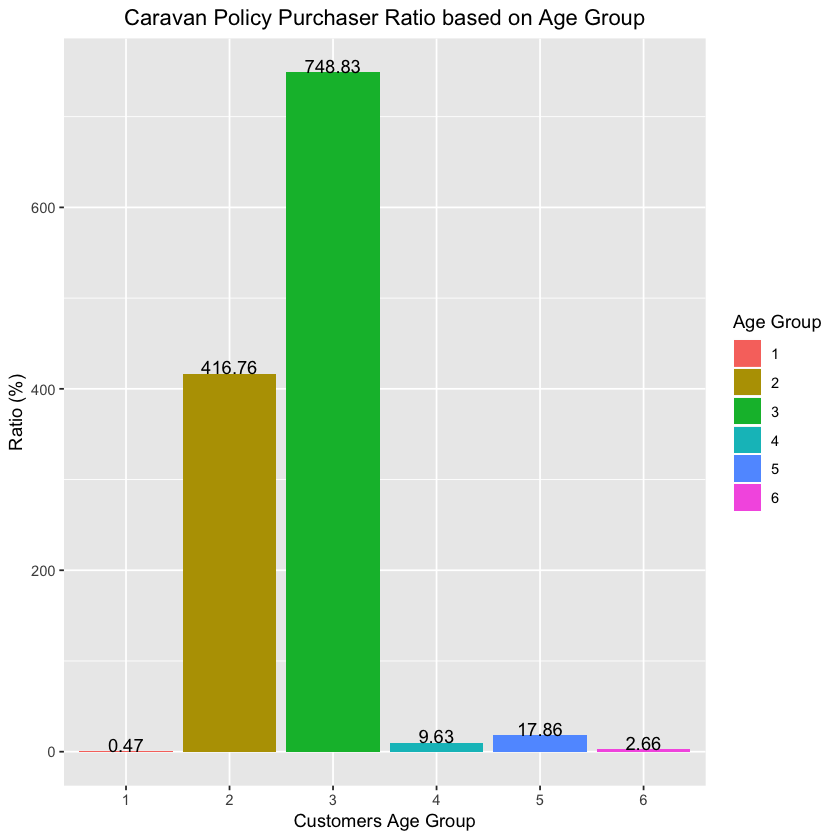

In [126]:

ggplot(age_group_ratio,aes(x = factor(age_group), y = ratio)) + 
    geom_bar(stat = "identity",aes(fill = factor(age_group))) + 
    geom_text(aes(label = ratio), vjust = 0) +
    labs(x="Customers Age Group", y = "Ratio (%)") +
    scale_fill_discrete(name = "Age Group") +
    ggtitle("Caravan Policy Purchaser Ratio based on Age Group") + 
    theme(plot.title = element_text(hjust = 0.5))

Source : Above plots have been taken from internet

<b><font color = blue > Based on above plots, age group of 30-40 Yrs have the higher puchase ratio for buying caravan policy </font><b>

**Fitting OLS (ordinary least sqaure ---> Linear Regression)**

In [78]:
linearmodel.fit =  lm(V86~., data = os_train_data)
summary(linearmodel.fit)


Call:
lm(formula = V86 ~ ., data = os_train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3729 -0.3867  0.1007  0.3600  1.0149 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.570723   0.775808   7.181 7.37e-13 ***
V1           0.010286   0.003198   3.217 0.001300 ** 
V2          -0.052300   0.012272  -4.262 2.05e-05 ***
V3          -0.003604   0.010167  -0.354 0.723013    
V4           0.053317   0.006885   7.744 1.04e-14 ***
V5          -0.041755   0.014358  -2.908 0.003644 ** 
V6          -0.012806   0.007617  -1.681 0.092728 .  
V7           0.007290   0.008534   0.854 0.392986    
V8           0.014709   0.007460   1.972 0.048659 *  
V9          -0.001122   0.008021  -0.140 0.888798    
V10          0.038670   0.010545   3.667 0.000246 ***
V11          0.020326   0.009996   2.033 0.042044 *  
V12          0.017765   0.010617   1.673 0.094303 .  
V13         -0.014417   0.009178  -1.571 0.116267    
V14         -0.017720   0.0095

In [79]:
linearmodel.Predict = predict(linearmodel.fit,ICB.Test)
LSE = mean((linearModel.Predict-ICB.Test$V86)**2)
LSE

Warning message in linearModel.Predict - ICB.Test$V86:
“longer object length is not a multiple of shorter object length”

[1] 54.51762

> **least square error is way too high and Very false predict rate by fitting linear model**

**Forward Selection**

In [80]:
library(leaps)

In [81]:
predict.regsubsets = function(object, newdata, id){
  form = as.formula(object$call[[2]])
  mat = model.matrix(form, newdata)
  coefi = coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
}

In [82]:
train_true_predictor = os_train_data$V86
test_true_predictor = ICB.Test$V86


In [83]:
# create objects to store error
store_train_error.fwd =matrix(rep(NA, 85))
store_test_error.fwd = matrix(rep(NA, 85))

In [84]:
forward.Fit = regsubsets(V86~., data = ICB.Fulldata, nbest = 1, nvmax = 85, method = "forward")
my_sum_fwd <- summary(forward.Fit)
names(my_sum_fwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 74

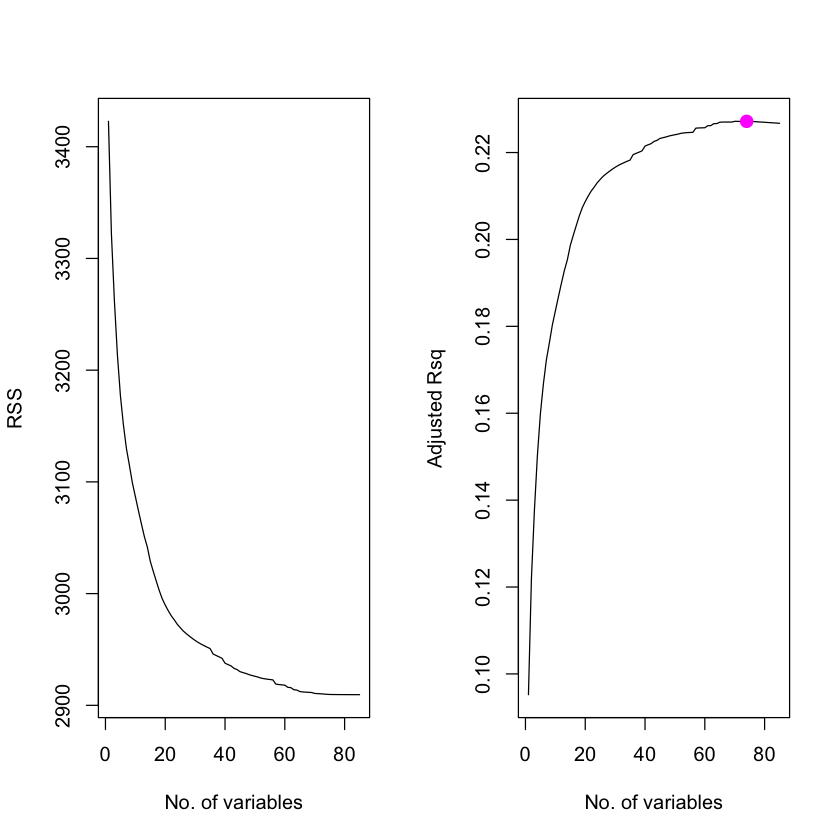

In [85]:
par(mfrow = c(1,2))
plot(my_sum_fwd$rss, xlab = "No. of variables", ylab = "RSS", type = "l")
plot(my_sum_fwd$adjr2, xlab = "No. of variables", ylab = "Adjusted Rsq", type = "l")

min_r2 <- which.max(my_sum_fwd$adjr2)
points(min_r2, my_sum_fwd$adjr2[min_r2], col="magenta", cex=1.5, pch=16)
min_r2

>**RSS decreases monotonically with the number of included variables, and that Rsquare increases monotonically.Rsquare suggetsts that model with 74 variables is best.So, RSS or Rsquare cannot be relied upon building the model**


[1] 66

[1] 40

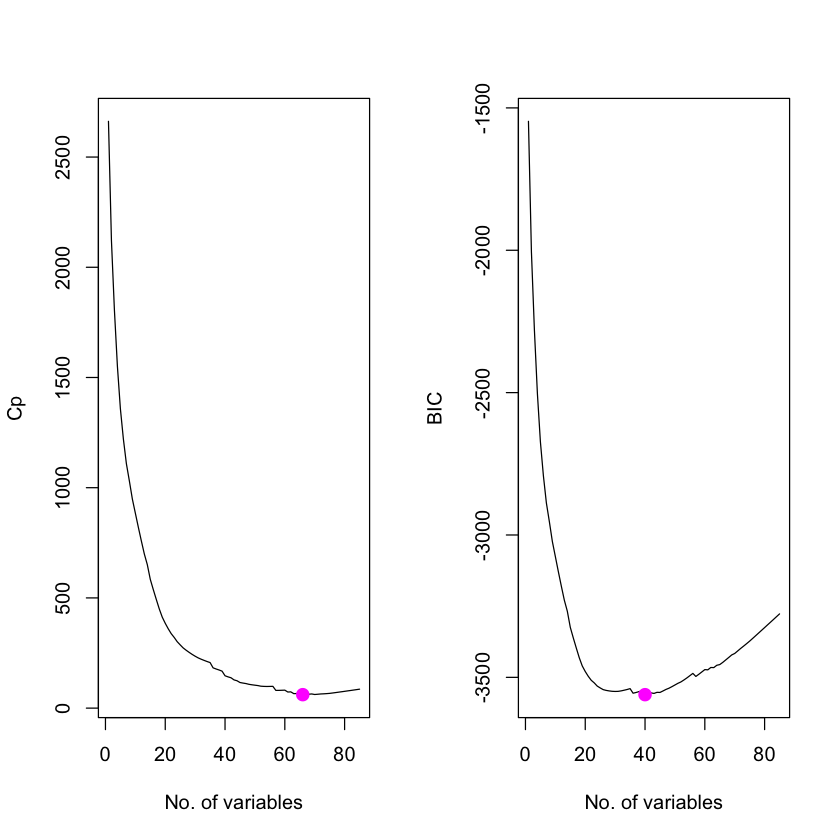

In [86]:
par(mfrow = c(1,2))
plot(my_sum_fwd$cp, xlab = "No. of variables", ylab = "Cp", type = "l")

min_bp <- which.min(my_sum_fwd$cp)
points(min_bp, my_sum_fwd$cp[min_bp], col="magenta", cex=1.5, pch=16) 
min_bp

plot(my_sum_fwd$bic, xlab = "No. of variables", ylab = "BIC", type = "l")
min_bic <- which.min(my_sum_fwd$bic)
points(min_bic, my_sum_fwd$bic[min_bic], col="magenta", cex=1.5, pch=16) 
min_bic


> **Mallows' Cp-statistic estimates the size of the bias that is introduced into the predicted responses by having an underspecified model.**

>**Lowest Cp and BIS fits the model best , According to Cp and BIS the model with 66 and 40 performs best**

> **<font color="red">Hence No of variables less than 40 would be under fitting the model and model with more than 75 will overfit for forward subset selection*</font>**

In [87]:
for (i in 1:85){
    # make the predictions
    y_hat_train = predict(forward.Fit, newdata = os_train_data, id = i)
    y_hat_test = predict(forward.Fit, newdata = ICB.Test, id = i)
    
    # compare the prediction with the true
    store_train_error.fwd[i] = (1/length(train_true_predictor))*sum((train_true_predictor-y_hat_train)^2)
    store_test_error.fwd[i] = (1/length(test_true_predictor))*sum((test_true_predictor-y_hat_test)^2)

}

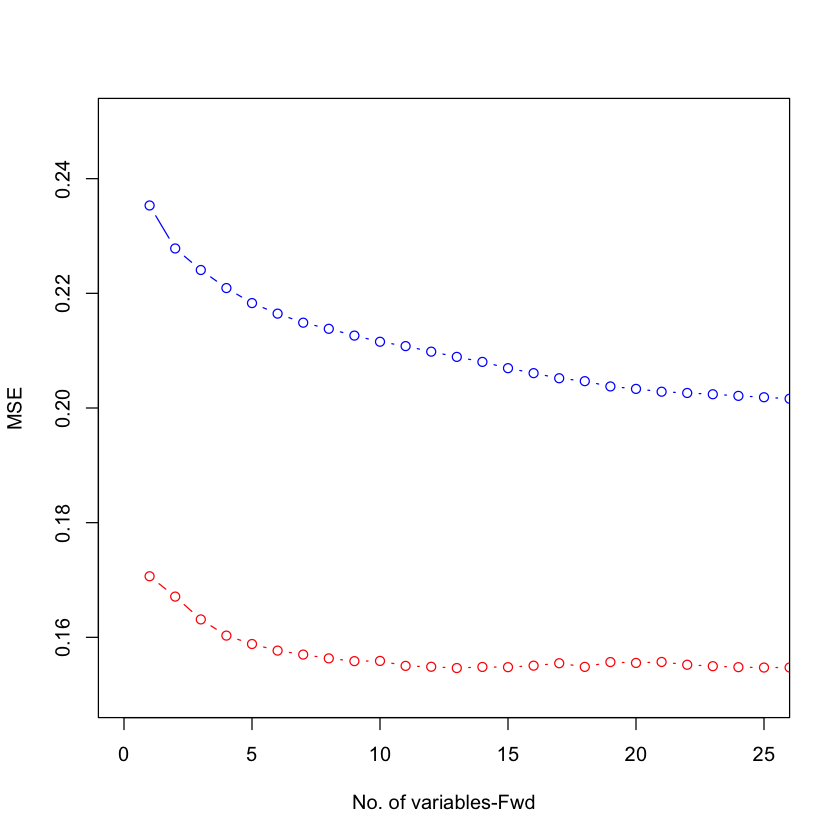

In [88]:
plot(store_train_error.fwd, col = "blue", type = "b", xlab = "No. of variables-Fwd", ylab = "MSE",xlim = c(0,25),ylim = c(0.15,0.25))
lines(store_test_error.fwd, col = "red", type = "b")
# which(store_test_error.fwd == min(store_train_error.fwd))

In [89]:
forward_test_error = min(store_test_error.fwd[i])
forward_test_error

[1] 0.1528104

>**Minimum test Error estimated by Forward subset selection is 0.0.15281038600591**

**Backward subset selection**

In [90]:
# create objects to store error
store_train_error.bwd =rep(NA, 85)
store_test_error.bwd = rep(NA, 85)

In [91]:
backward.Fit = regsubsets(V86~., data = ICB.Fulldata, nbest = 1, nvmax = 85, method = "backward")
my_sum_bwd <- summary(backward.Fit)
names(my_sum_bwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 69

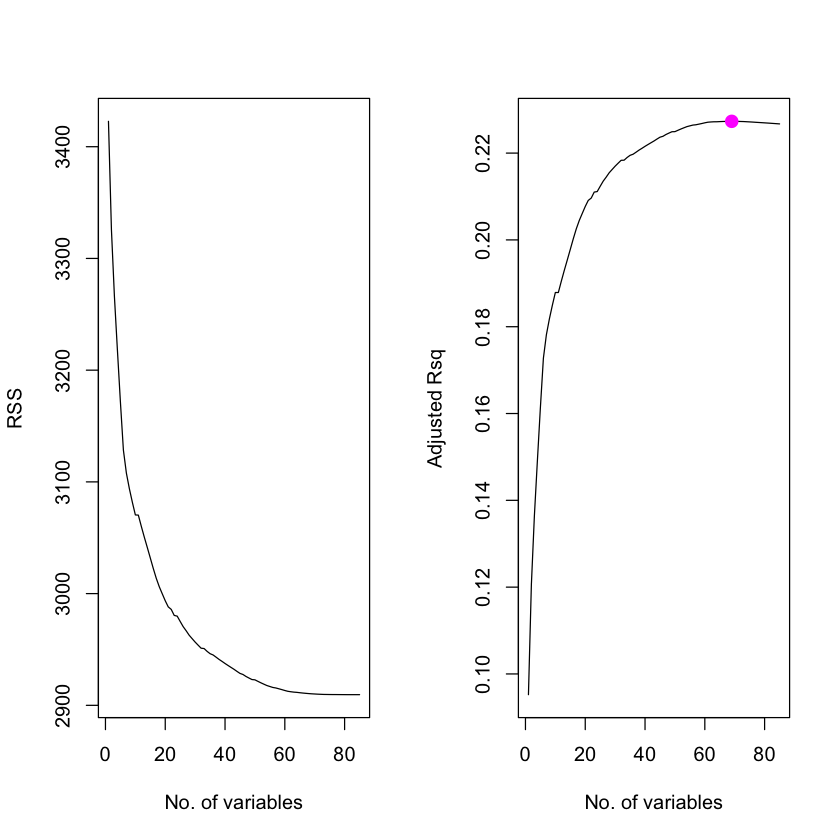

In [92]:
par(mfrow = c(1,2))
plot(my_sum_bwd$rss, xlab = "No. of variables", ylab = "RSS", type = "l")
plot(my_sum_bwd$adjr2, xlab = "No. of variables", ylab = "Adjusted Rsq", type = "l")

min_r2 <- which.max(my_sum_bwd$adjr2)
points(min_r2, my_sum_bwd$adjr2[min_r2], col="magenta", cex=1.5, pch=16)
min_r2

[1] 62

[1] 32

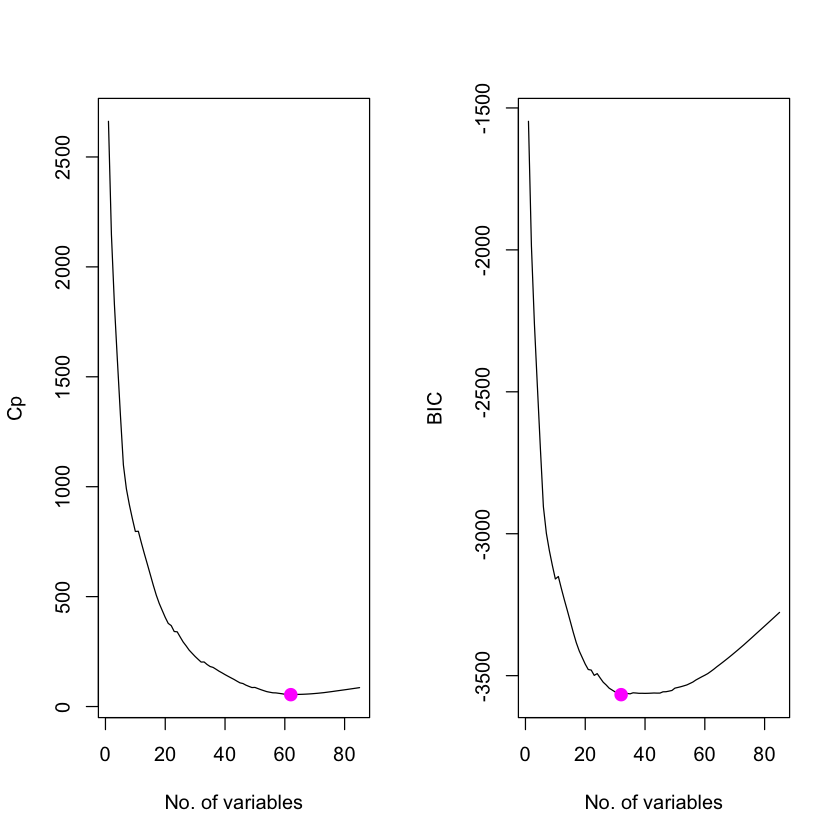

In [93]:
par(mfrow =c(1,2))
plot(my_sum_bwd$cp, xlab = "No. of variables", ylab = "Cp", type = "l")
min_bp <- which.min(my_sum_bwd$cp)
points(min_bp, my_sum_bwd$cp[min_bp], col="magenta", cex=1.5, pch=16) 
min_bp

plot(my_sum_bwd$bic, xlab = "No. of variables", ylab = "BIC", type = "l")
min_bic <- which.min(my_sum_bwd$bic)
points(min_bic, my_sum_bwd$bic[min_bic], col="magenta", cex=1.5, pch=16) 
min_bic

>**Lowest Cp and BIS fits the model best , According to Cp and BIS the model with 62 and 32 performs best**

> **<font color="red">Hence No of variables less than 30 would be under fitting the model and model with more than 70 will overfit for backward subset selection</font>**

In [94]:
for (i in 1:85){
    # make the predictions
    y_hat_train = predict(backward.Fit, newdata = os_train_data, id = i)
    y_hat_test = predict(backward.Fit, newdata = ICB.Test, id = i)
    
    # compare the prediction with the true
    store_train_error.bwd[i] = (1/length(train_true_predictor))*sum((train_true_predictor-y_hat_train)^2)
    store_test_error.bwd[i] = (1/length(test_true_predictor))*sum((test_true_predictor-y_hat_test)^2)

}

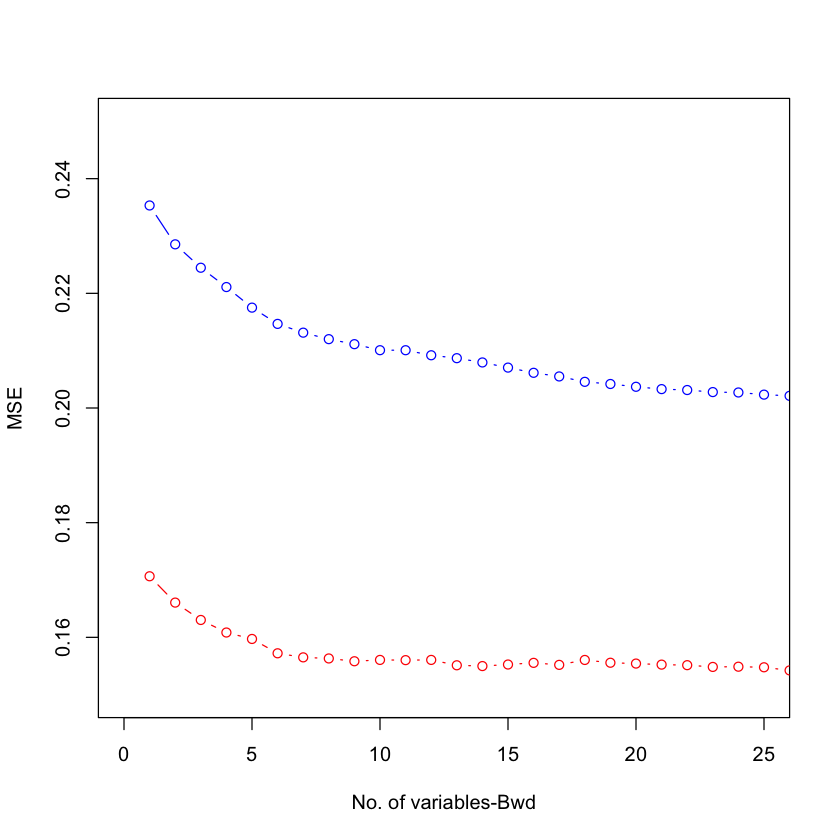

In [95]:
plot(store_train_error.bwd, col = "blue", type = "b", xlab = "No. of variables-Bwd", ylab = "MSE",xlim = c(0,25),ylim = c(0.15,0.25))
lines(store_test_error.bwd, col = "red", type = "b")
# which(store_test_error == min(store_train_error))

In [96]:
backward_test_error = min(store_test_error.bwd[i])
backward_test_error

[1] 0.1528104

>**Minimum test Error estimated by Backward subset selection is 0.15281038600591**

**Lasso Regression**

In [97]:
X = as.matrix(os_train_data)[,1:85]
Y = os_train_data$V86

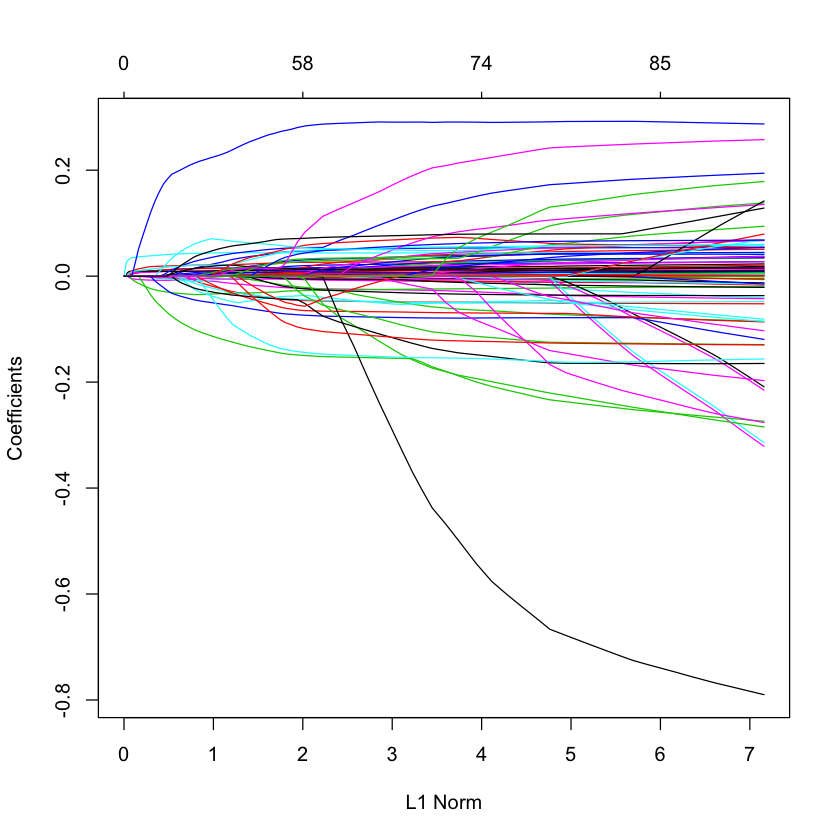

In [98]:
Lasso.Fit = glmnet(X,Y,alpha=1)
plot(Lasso.Fit)

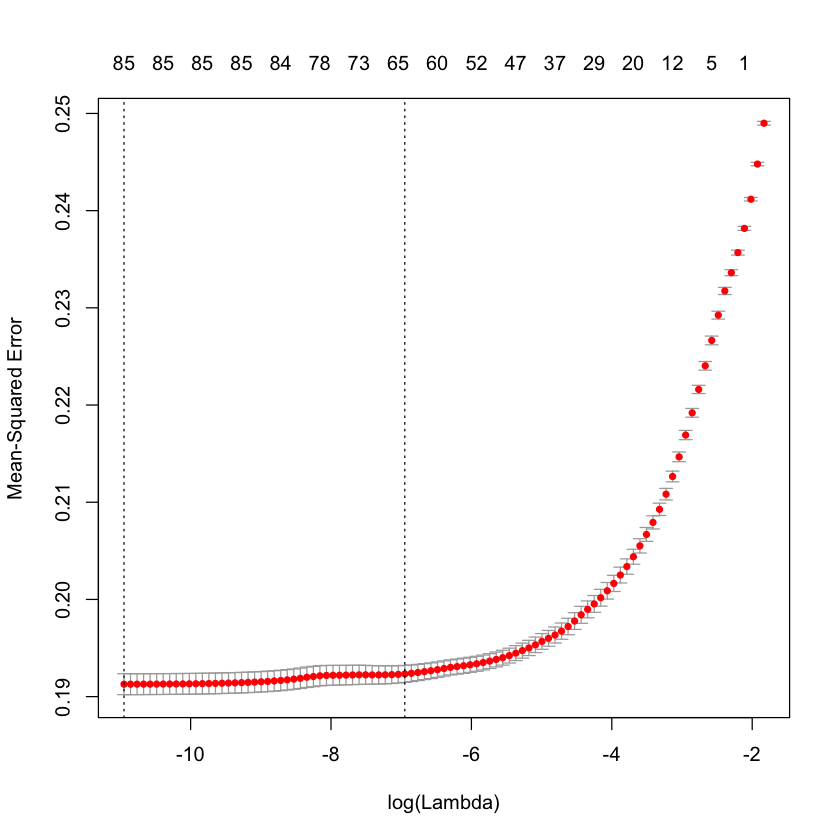

In [99]:
set.seed(1122)
cv.out <- cv.glmnet(X, Y, alpha = 1)
plot(cv.out)

In [100]:
#Best lambda
cv.out = cv.glmnet(X, Y, alpha = 1)
best.lambda = cv.out$lambda.min
best.lambda

[1] 1.757309e-05

In [101]:

lasso.pred <- predict(Lasso.Fit, s = best.lambda, newx = as.matrix(ICB.Test)[,1:85], type = "response")

y_hat_lasso <- lasso.pred
y_true <- ICB.Test$V86

lasso.MeanSquareError <- mean((y_hat_lasso-y_true)^2) 
lasso.MeanSquareError

[1] 0.2149782

>**Mean square Error is less than MSE by linear model. Lasso predicts fits the data good.**

**Ridge Regression**

In [102]:
Ridge_Fit = glmnet(X,Y,alpha=0)

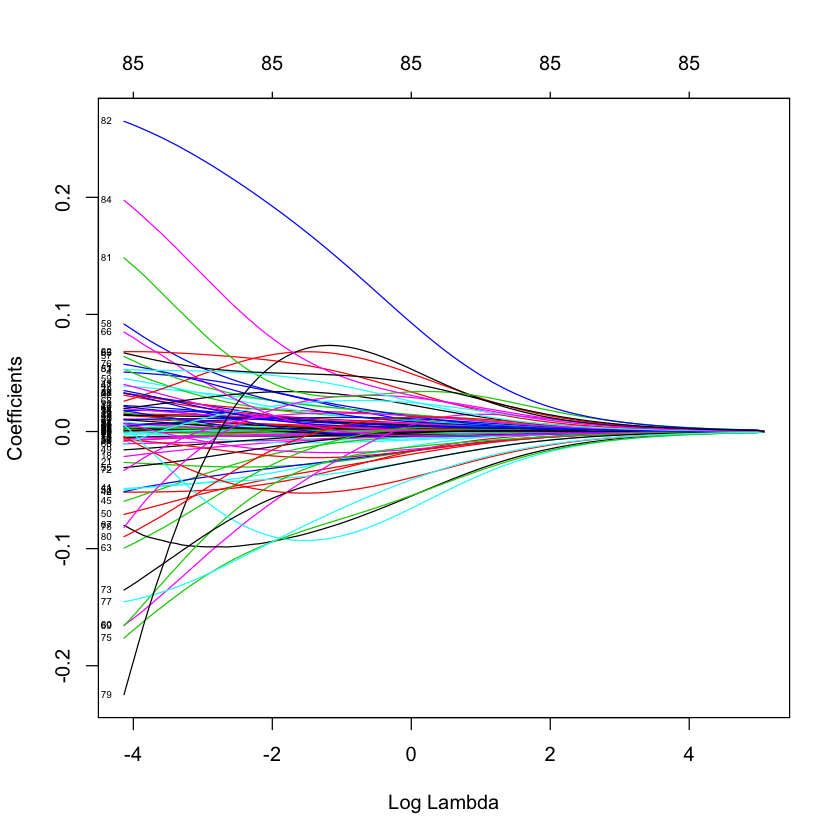

In [103]:
plot(Ridge_Fit,xvar = "lambda",label="TRUE")

> **Ridge retains all variables while shrinking the coefficients to zero. When lambda values become small, the plot becomes unregular.**

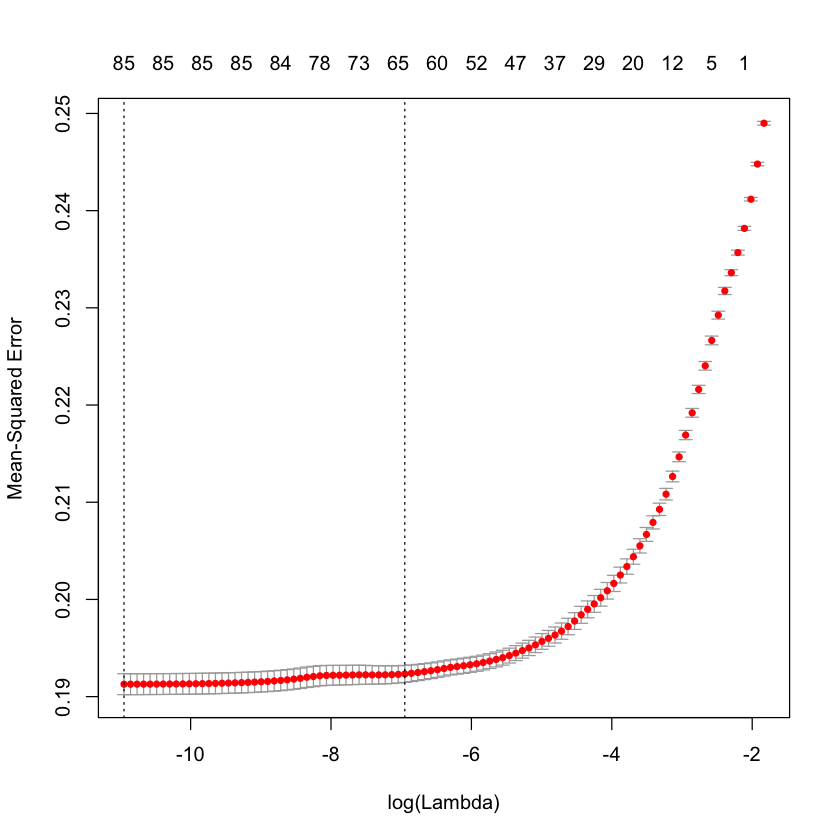

In [104]:
set.seed(1122)
cvout.Ridge <- cv.glmnet(X, Y, alpha = 1)
plot(cvout.Ridge)

In [105]:
bestlambda.Ridge = cvout.Ridge$lambda.min
bestlambda.Ridge

[1] 1.757309e-05

In [106]:
ridge.prediction <- predict(Ridge_Fit, s = bestlambda.Ridge, newx = as.matrix(ICB.Test)[,1:85], type = "response")


In [107]:
y_hat <- ridge.prediction
y_true <- ICB.Test$V86
ridge.MeanSquareError <- mean((y_hat - y_true)^2)
ridge.MeanSquareError

[1] 0.214299

In [108]:
Model<- c("Forward","Backward","Lasso","Ridge")

In [109]:
MSE <- c(0.15281038600591,0.15281038600591,0.214978195252476,0.214299031823994)

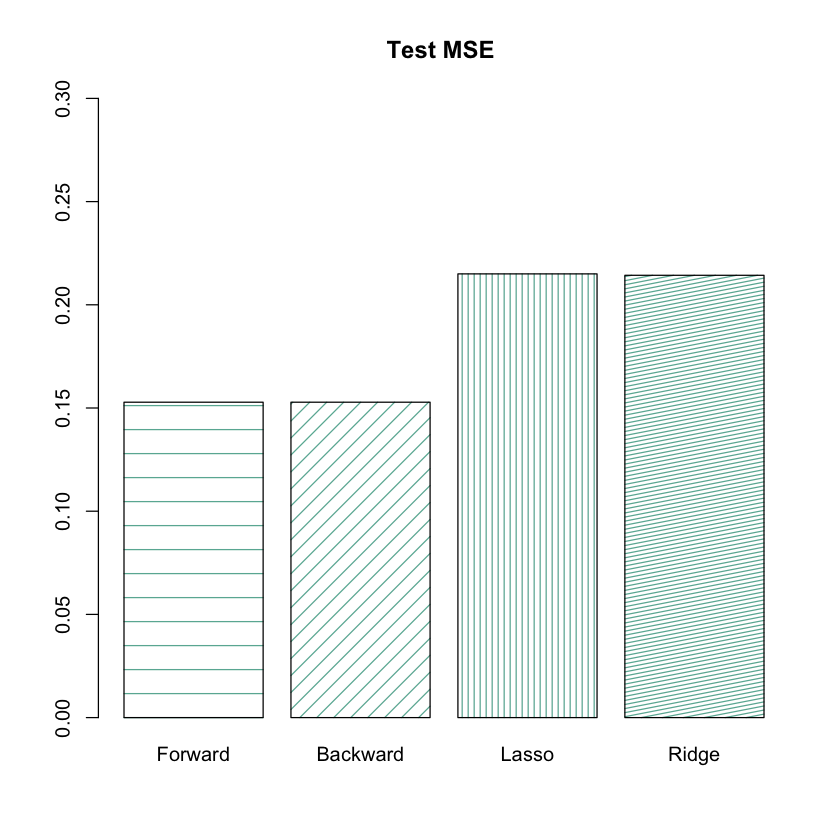

In [110]:
barplot(MSE,names.arg = Model,
        main = "Test MSE ",ylim =c(0,0.3), density=c(5,10,20,30,7) , angle=c(0,45,90,11,36) , col="#69b3a2")

>**COLCLUSION :** **<font color="red"> Clearly linear model performs the worst of all models for this problem.It has MSE of around 55. Among Forward, backward, Lasso, Ridge --> Forward and backward subset selection out performs both Lasso and Ridge.</font>**

# Question 3
ESL textbook exercise 2.8 modified: Compare the classification
performance of linear regression and k-nearest neighbor classification on the
zipcode data. In particular, consider only the 7’s and 9’s for this problem, and k =
1, 3, 5, 7, 9, 11, 13,15. Show the test error for each choice of k. Describe your
results – are you surprised by the differences in performance?

In [111]:
train.Data<-(read.table(file.path(getwd(),"zip.train")))
head(train.Data)
dim(train.Data)

V1 V2 V3 V4 V5     V6     V7     V8     V9     V10    ... V248   V249  
1 6  -1 -1 -1 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 ...  0.304  0.823
2 5  -1 -1 -1 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 ... -0.671 -0.671
3 4  -1 -1 -1 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 ... -1.000 -1.000
4 7  -1 -1 -1 -1.000 -1.000 -0.273  0.684  0.960  0.450 ... -0.318  1.000
5 3  -1 -1 -1 -1.000 -1.000 -0.928 -0.204  0.751  0.466 ...  0.466  0.639
6 6  -1 -1 -1 -1.000 -1.000 -0.397  0.983 -0.535 -1.000 ...  0.803  0.015
  V250   V251   V252   V253   V254   V255   V256   V257
1  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1  
2 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1  
3 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1  
4  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1  
5  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1  
6 -0.862 -0.871 -0.437 -1.000 -1.000 -1.000 -1.000 -1

[1] 7291  257

> **Dimension of Full Training data is 7291 x 257**

In [112]:
test.Data<-(read.table(file.path(getwd(),"zip.test")))
head(test.Data)
dim(test.Data)

V1 V2 V3 V4 V5     V6   V7     V8     V9     V10    ... V248   V249   V250  
1 9  -1 -1 -1 -1.000 -1.0 -0.948 -0.561  0.148  0.384 ... -1.000 -0.908  0.430
2 6  -1 -1 -1 -1.000 -1.0 -1.000 -1.000 -1.000 -1.000 ... -1.000 -1.000 -1.000
3 3  -1 -1 -1 -0.593  0.7  1.000  1.000  1.000  1.000 ...  1.000  0.717  0.333
4 6  -1 -1 -1 -1.000 -1.0 -1.000 -1.000 -1.000 -1.000 ... -1.000 -1.000 -1.000
5 6  -1 -1 -1 -1.000 -1.0 -1.000 -1.000 -0.858 -0.106 ...  0.901  0.901  0.901
6 0  -1 -1 -1 -1.000 -1.0 -1.000  0.195  1.000  0.054 ...  0.224  1.000  0.988
  V251   V252   V253   V254   V255 V256 V257
1  0.622 -0.973 -1.000 -1.000 -1   -1   -1  
2 -1.000 -1.000 -1.000 -1.000 -1   -1   -1  
3  0.162 -0.393 -1.000 -1.000 -1   -1   -1  
4 -1.000 -1.000 -1.000 -1.000 -1   -1   -1  
5  0.290 -0.369 -0.867 -1.000 -1   -1   -1  
6  0.187  0.139 -0.641 -0.812 -1   -1   -1

[1] 2007  257

> **Dimension of Full Testing data is 2007 x 257**

In [113]:
train.Data<-train.Data[train.Data[,1]%in% c(7,9),]
head(train.Data)
dim(train.Data)

V1 V2 V3 V4 V5     V6     V7     V8     V9     V10    ... V248   V249  
4  7  -1 -1 -1 -1.000 -1.000 -0.273  0.684  0.960  0.450 ... -0.318  1.000
11 7  -1 -1 -1 -1.000 -1.000 -0.596  0.912  1.000  0.290 ... -1.000 -0.795
15 7  -1 -1 -1 -1.000 -1.000 -1.000 -1.000 -1.000 -0.632 ... -1.000 -0.967
16 7  -1 -1 -1 -0.929  0.351  0.798  0.806  0.114  0.015 ...  0.835 -0.086
23 7  -1 -1 -1 -1.000 -0.869  0.777 -0.007 -0.697 -1.000 ... -0.933  0.667
26 7  -1 -1 -1 -1.000 -0.846 -0.011 -0.920 -1.000 -1.000 ... -1.000  0.008
   V250   V251   V252 V253 V254 V255 V256 V257
4   0.536 -0.987 -1   -1   -1   -1   -1   -1  
11  0.663 -0.074 -1   -1   -1   -1   -1   -1  
15  0.866 -0.001 -1   -1   -1   -1   -1   -1  
16 -0.991 -1.000 -1   -1   -1   -1   -1   -1  
23 -0.315 -1.000 -1   -1   -1   -1   -1   -1  
26  0.405 -1.000 -1   -1   -1   -1   -1   -1

[1] 1289  257

In [114]:
test.Data<-test.Data[test.Data[,1]%in% c(7,9),]
head(test.Data)
dim(test.Data)

V1 V2 V3    V4     V5     V6     V7     V8     V9     V10    ... V248  
1  9  -1 -1.00 -1.000 -1.000 -1.000 -0.948 -0.561  0.148  0.384 ... -1.000
10 9  -1 -1.00 -1.000 -1.000 -1.000 -0.904 -0.060  0.638  0.678 ... -0.567
19 9  -1 -1.00 -1.000 -0.916 -0.600 -0.034  0.711  1.000  0.488 ...  1.000
24 9  -1 -1.00 -1.000 -1.000 -1.000 -1.000 -1.000 -0.441  0.530 ... -1.000
31 7  -1 -0.99  0.700  0.283 -0.131 -0.598 -1.000 -1.000 -1.000 ... -0.700
35 7  -1 -1.00 -0.862  0.000  0.296 -0.231  0.142  0.384  0.763 ...  0.703
   V249   V250   V251   V252   V253   V254 V255 V256 V257
1  -0.908  0.430  0.622 -0.973 -1.000 -1   -1   -1   -1  
10  0.642 -0.925 -1.000 -1.000 -1.000 -1   -1   -1   -1  
19  0.375 -0.982 -1.000 -1.000 -1.000 -1   -1   -1   -1  
24 -1.000 -1.000 -0.057  0.558 -0.999 -1   -1   -1   -1  
31  0.734 -0.261 -1.000 -1.000 -1.000 -1   -1   -1   -1  
35 -0.448 -1.000 -1.000 -1.000 -1.000 -1   -1   -1   -1

[1] 324 257

> **Training and testing sets for our desired question is 1289x257 and 324x257**

In [115]:
linear.model = lm(V1~.,data= train.Data)

In [116]:
lm.predict = predict(linear.model,test.Data)
LSE = mean((lm.predict-test.Data$V1)**2)
LSE

Warning message in predict.lm(linear.model, test.Data):
“prediction from a rank-deficient fit may be misleading”

[1] 2.588836

In [117]:
library(class)
knn_Error = function(val){
    knn.prediction_training = knn(train.Data,train.Data,train.Data$V1,k=val)
    training_error = mean(knn.prediction_training!=train.Data$V1)
    knn.prediction_training = knn(train.Data,test.Data,train.Data$V1,k=val)
    testing_error = mean(knn.prediction_training!=test.Data$V1)
    cat('For k =', val, '\n')
    cat('training error =', training_error, '\n')
    cat('test error =', testing_error, '\n')
    cat("**********************","\n")
                        
}

In [118]:
for(k in c(1,3,5,7,9,11,13,15)) {
  knn_Error(k)
}

For k = 1 
training error = 0 
test error = 0.01851852 
********************** 
For k = 3 
training error = 0.006982157 
test error = 0.01851852 
********************** 
For k = 5 
training error = 0.006982157 
test error = 0.0154321 
********************** 
For k = 7 
training error = 0.008533747 
test error = 0.01851852 
********************** 
For k = 9 
training error = 0.008533747 
test error = 0.02160494 
********************** 
For k = 11 
training error = 0.009309542 
test error = 0.02777778 
********************** 
For k = 13 
training error = 0.01086113 
test error = 0.0308642 
********************** 
For k = 15 
training error = 0.01163693 
test error = 0.02777778 
********************** 


In [119]:
k = c(1,3,5,7,9,11,13,15)
training_error = c(0,0.006982157,0.006982157,0.008533747,0.008533747,0.009309542,0.01163693,0.01163693)
testing_error = c(0.01851852,0.01851852,0.0154321,0.01851852,0.02160494,0.02777778,0.0308642,0.02777778)
data = data.frame(k,training_error,testing_error)
data

k  training_error testing_error
1  1 0.000000000    0.01851852   
2  3 0.006982157    0.01851852   
3  5 0.006982157    0.01543210   
4  7 0.008533747    0.01851852   
5  9 0.008533747    0.02160494   
6 11 0.009309542    0.02777778   
7 13 0.011636930    0.03086420   
8 15 0.011636930    0.02777778

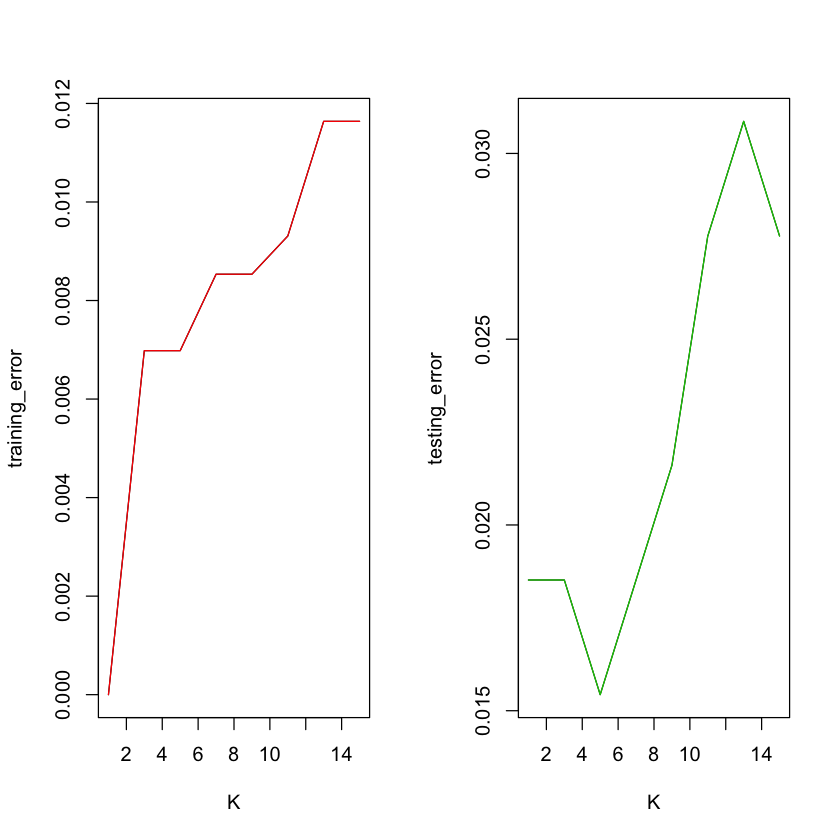

In [120]:
par(mfrow =c(1,2))
plot(data$k, data$training_error,xlab = "K",ylab= "training_error", type = "l") 
lines(data$k, data$training_error, type = "l", col = 2)

plot(data$k, data$testing_error,xlab = "K",ylab= "testing_error", type = "l") 
lines(data$k, data$testing_error, type = "l", col = 3)



>**<font col="red">CONCLUSION</font>**

> **We believe that linear regression is less effective on this case, i think the pixels for different samples do not match properly.The linear regression performs better on the test data than on the training data, something which is unexpected. Nearest neighbor results are quite reasonable.The training error results are reduced by the fact that there is one direct hit.**

> **As the present data has 86 features, as K increases the KNN couldnt perform better due to large dimension. "Dimensionality Curse"**